# Assignment #4

READ ALL INSTRUCTIONS CAREFULLY

This assignment is a puzzle. You have been given a data set with some semi-informative column headers but no additional information about it. Your goal is to investigate the data, understand as much about it as you can, and report back what you find.

You are free to use any and all of the techniques we have covered this semester: EDA, data wrangling, visualization (scatter plots, line plots, histograms, jointplots, etc.), descriptive statistics (mean, median, variance, covariance, etc.), regression / model fitting, loss functions (MSE, MAE), R^2, cross-validation, bootstrapping, gradient descent, etc... 

There are many different ways to approach this assignment and be successful. I recommend starting simple and getting slowly more sophisticated as needed.

## Collaborators

You must work in groups of 2-3. You cannot work on this assignment alone. Your partners cannot be anyone you have partnered with previously on an assignment and they cannot be in your group for the semester project.

**Names of all collaborators go here** (including yourself):

## Tools

You are not allowed to use LLMs (including the LLM results that pop up in Google search). You may use search online for ideas, use StackExchange, and I highly encourage using Python library documentation.

Hint: It may be useful to use the sklearn library for model fitting (and not to implement model fitting or optimization by hand).

## Submission Instructions

You must submit two files. One is your **Jupyter notebook** that you use to explore and analyze the data. The second file is a separate **PDF** reporting, presenting, and explaining your results with no code in it.

**Only one person** in your group should submit the assignment files on Canvas. Be sure everyone's names are listed under collaborators in both the notebook and the PDF so everyone gets credit!

## Potentially Helpful Documentation


https://scikit-learn.org/stable/api/sklearn.model_selection.html

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/api/sklearn.metrics.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

# Your Code Below

## Imports and CoW

In [3]:
# Add all of your import statements here. ONLY include the imports you actually use. There are useful tools in the scikit-learn library for regression and model fitting, but you are not required to use it. If you use it, you will need to install it into your virtual environment.
from pathlib import Path
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.<something> import <something>

In [4]:
# Enforce Copy-on-Write (CoW) semantics here
pd.options.mode.copy_on_write = True

## Project Folder Organization and File Reading

You must read in the given data file using relative paths, as shown in previous assignments. Organize your work to be in a project folder, with src and data subfolders. Place your solution notebook in the src folder, and the given data file in the data folder.

In [5]:
# Read in the data file (using relative paths for reproducibility). It should be able to download your notebook, put it in the src folder of my project folder, and run it without changing anything.
# set standard paths
cwd = Path().cwd() #set our cwd
project_folder = cwd.parent #set our project folder as the cwd parent

In [6]:
# contruct the path to and retrieve the file that holds the info regarding the buinesses
path = Path('data/mystery-1.csv') # using a data folder makes life easier
mystery_file = project_folder / path # join the project folder with the dataset path
if not mystery_file.exists():  # error catching in case the file is not found
	raise FileNotFoundError(f"Dataset file not found: {mystery_file}")

df_mystery = pd.read_csv(mystery_file)

# Explore data

In [86]:
df_mystery.head()

x|y|z|d1|d2|d3|d4|c
0  45.25704327|109.76417917|38.05759603823384|-59...
1  45.14670334|109.81468014|40.92275497629194|-57...
2  47.73228811|109.73347168|39.181963976259205|-4...
3  46.39393552|109.37686729|37.073852642673714|-5...
4  52.9087|109.6072|37.583850691646205|-12.337559...

In [ ]:
df_mystery.columns

Index(['x|y|z|d1|d2|d3|d4|c'], dtype='object')

In [8]:
df_mystery.info

<bound method DataFrame.info of                                     x|y|z|d1|d2|d3|d4|c
0     45.25704327|109.76417917|38.05759603823384|-59...
1     45.14670334|109.81468014|40.92275497629194|-57...
2     47.73228811|109.73347168|39.181963976259205|-4...
3     46.39393552|109.37686729|37.073852642673714|-5...
4     52.9087|109.6072|37.583850691646205|-12.337559...
...                                                 ...
1849  69.12727174999999|15.469880873|44.189617511396...
1850  79.06287943|19.10065579|40.525671245974074|457...
1851  67.09992541|10.135119325|37.65319272597221|412...
1852  76.6846168|16.157544846|36.88472364432388|449....
1853  77.07055797999999|11.330551663|40.954199935287...

[1854 rows x 1 columns]>

In [9]:
df_mystery.columns

Index(['x|y|z|d1|d2|d3|d4|c'], dtype='object')

weird.  has data seperated by pipes, an index with pipes, dtype object, 1854 rows and 1 column.

In [10]:
df_mystery.describe()

x|y|z|d1|d2|d3|d4|c
count                                                1854
unique                                               1854
top     45.25704327|109.76417917|38.05759603823384|-59...
freq                                                    1

that didnt tell us much.  thinking of treating the pipe as a delimiter and splitting.

do I need to handle na values?

does not appear to be any na values. splitting at the pipes.

In [11]:
df_mystery_sep = pd.read_csv(mystery_file, delimiter= '|')

explore separated dataframe

In [97]:
print( 'na vals: ', df_mystery_sep.isna().value_counts(), '\nnull vals: ',df_mystery_sep.isnull().value_counts())

na vals:  x      y      z      d1     d2     d3     d4     c    
False  False  False  False  False  False  False  False    1854
Name: count, dtype: int64 
null vals:  x      y      z      d1     d2     d3     d4     c    
False  False  False  False  False  False  False  False    1854
Name: count, dtype: int64


no null, no na

In [12]:
df_mystery_sep.head()

x           y          z         d1         d2         d3  \
0  45.257043  109.764179  38.057596 -59.072649 -14.805744  37.863842   
1  45.146703  109.814680  40.922755 -57.052267 -15.018721  37.872534   
2  47.732288  109.733472  39.181964 -42.744882  -9.708060  37.671144   
3  46.393936  109.376867  37.073853 -51.804489 -12.540430  37.774738   
4  52.908700  109.607200  37.583851 -12.337559   2.932994  37.291647   

             d4     c  
0  94095.637152  11.0  
1  93969.141494   3.0  
2  93724.024307  11.0  
3  93377.854892  10.0  
4  93101.403795   0.0

In [113]:
df_mystery_sep.iloc[1849: 1854, :]

x          y          z          d1          d2         d3  \
1849  69.127272  15.469881  44.189618  413.268380   59.889351  36.593340   
1850  79.062879  19.100656  40.525671  457.867006  107.774087  36.857181   
1851  67.099925  10.135119  37.653193  412.503332   51.331193  36.618824   
1852  76.684617  16.157545  36.884724  449.725234   95.413365  36.727196   
1853  77.070558  11.330552  40.954200  472.560728   97.380800  36.745135   

               d4     c  
1849 -4790.832560  12.0  
1850 -4936.105016   4.0  
1851 -5086.125698   1.0  
1852 -5124.376623   1.0  
1853 -6575.228052   1.0

from the head() thought maybe x's were in order.  last 5 rows shows they are not

In [13]:
df_mystery_sep['c'].unique()

array([11.,  3., 10.,  0., 12.,  4.,  1.,  7.,  5.,  2.,  9.,  6.,  8.])

In [93]:
cs = df_mystery_sep['c'].unique()
cs.sort(axis=0)
cs


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

colums c has integer values that range for 0 to 12. May be categorical

In [16]:
df_mystery_sep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1854 non-null   float64
 1   y       1854 non-null   float64
 2   z       1854 non-null   float64
 3   d1      1854 non-null   float64
 4   d2      1854 non-null   float64
 5   d3      1854 non-null   float64
 6   d4      1854 non-null   float64
 7   c       1854 non-null   float64
dtypes: float64(8)
memory usage: 116.0 KB


In [17]:
df_mystery_sep.isna().value_counts()

x      y      z      d1     d2     d3     d4     c    
False  False  False  False  False  False  False  False    1854
Name: count, dtype: int64

No nulls, no Nas

In [18]:
df_mystery_sep.describe()

x            y            z           d1           d2  \
count  1854.000000  1854.000000  1854.000000  1854.000000  1854.000000   
mean     44.702607    53.394344    35.514137   138.298107     3.278987   
std      70.720754    74.296663    68.185888   159.671681    79.173899   
min    -999.000000  -999.000000  -999.000000  -999.000000  -999.000000   
25%      35.862902    32.303485    37.941742    24.969669   -28.312801   
50%      47.474927    57.428922    39.920321   142.894013   -10.266625   
75%      62.189990    81.894692    42.012014   252.666808    32.307670   
max      93.248123   109.814680    48.870364   474.250238   193.247985   

                d3            d4            c  
count  1854.000000   1854.000000  1854.000000  
mean     33.312987  28604.297833     6.002157  
std      67.983135  26765.170592     3.737760  
min    -999.000000  -6575.228052     0.000000  
25%      36.854105   4106.422132     3.000000  
50%      37.698475  21852.839683     6.000000  
75%      38.592883  50220.331945     9.000000  
max      39.963298  94095.637152    12.000000

c ranges from 0 to 12.

In [143]:
cols = ['x', 'y', 'z', 'd1', 'd2', 'd3', 'd4', 'c']
for col in cols:
    print(df_mystery_sep[col].value_counts())

x
-999.000000    8
 51.626700     4
 44.960000     4
 24.703600     4
 39.062600     3
              ..
 73.165100     1
 52.426051     1
 73.964327     1
 70.437222     1
 45.242406     1
Name: count, Length: 1805, dtype: int64
y
-999.000000    8
 20.761000     6
 61.530300     3
 61.145600     3
 65.376400     3
              ..
 11.624418     1
 20.748198     1
 20.638568     1
 17.713466     1
 20.615874     1
Name: count, Length: 1808, dtype: int64
z
-999.000000    8
 36.559350     1
 42.605554     1
 44.211274     1
 42.147507     1
              ..
 40.531790     1
 36.395774     1
 42.933681     1
 41.493579     1
 37.288487     1
Name: count, Length: 1847, dtype: int64
d1
-999.000000    8
 439.087301    1
-51.040003     1
 409.412039    1
 414.797934    1
              ..
 320.807677    1
 417.034295    1
 402.429604    1
 377.944245    1
-55.697312     1
Name: count, Length: 1847, dtype: int64
d2
-999.000000    8
-0.447345      4
-15.376320     4
-33.468931     4
-24.877798  

hmmm... -999 seems to be an outlier.  Thinking it may be a placeholder value. All have 8 rows that are -999.  Check out later if they are the same rows


Sorting values in c to check in any are missing:

In [25]:
df_mystery_sep['c'].value_counts().sort_index()

c
0.0     142
1.0     142
2.0     142
3.0     143
4.0     143
5.0     143
6.0     143
7.0     143
8.0     143
9.0     143
10.0    143
11.0    142
12.0    142
Name: count, dtype: int64

Fairly even number of values in c, ranging 0-12, with middle values (3-10) each having 1 more

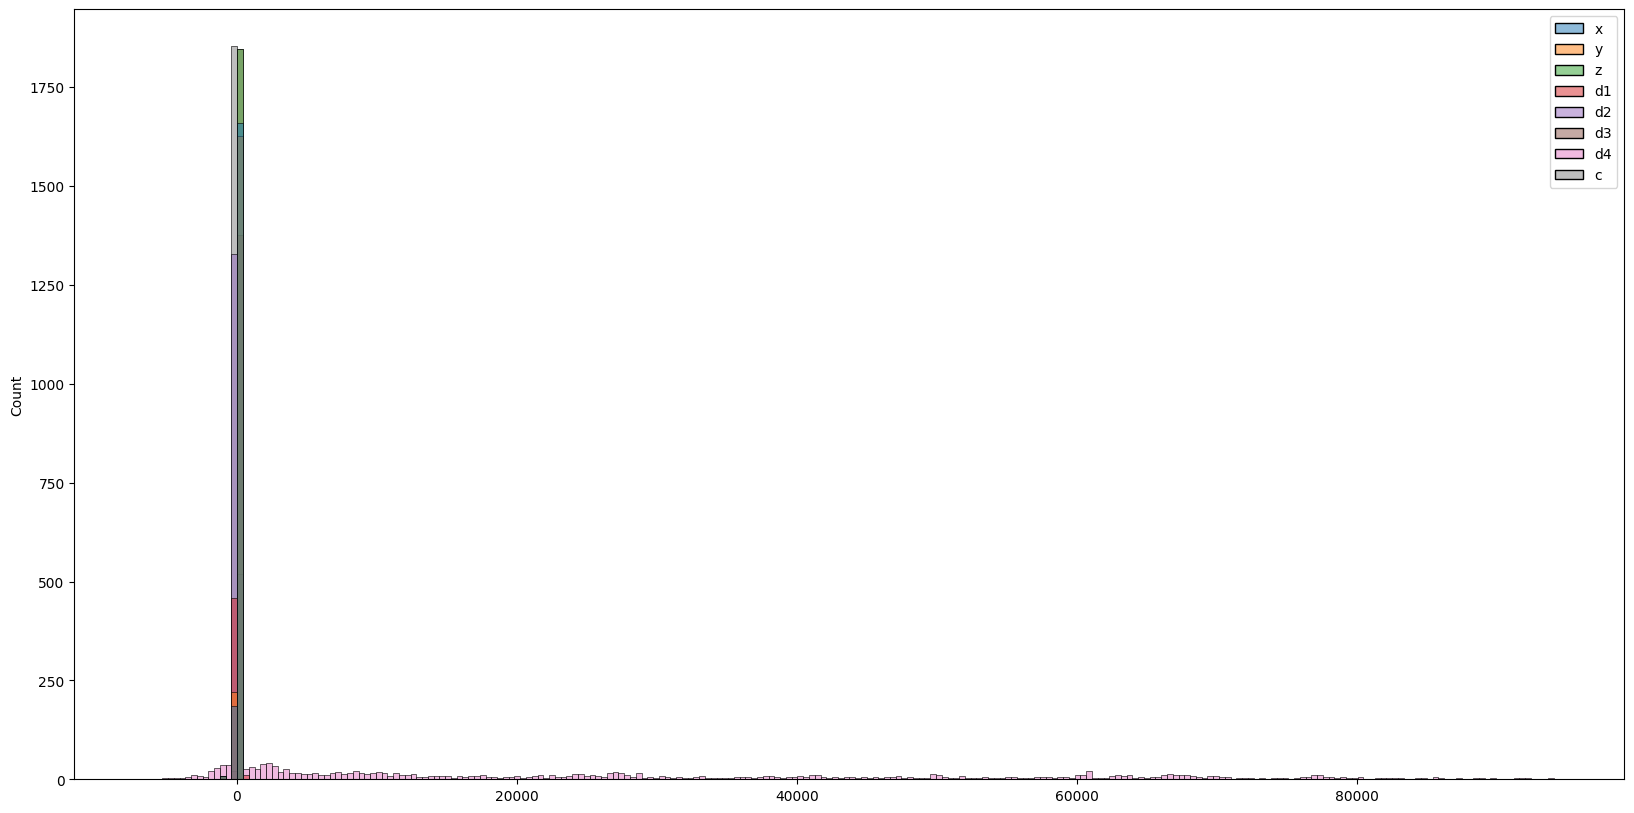

In [26]:
plt.figure(figsize=(20,10))
sns.histplot(data=df_mystery_sep)
plt.show()

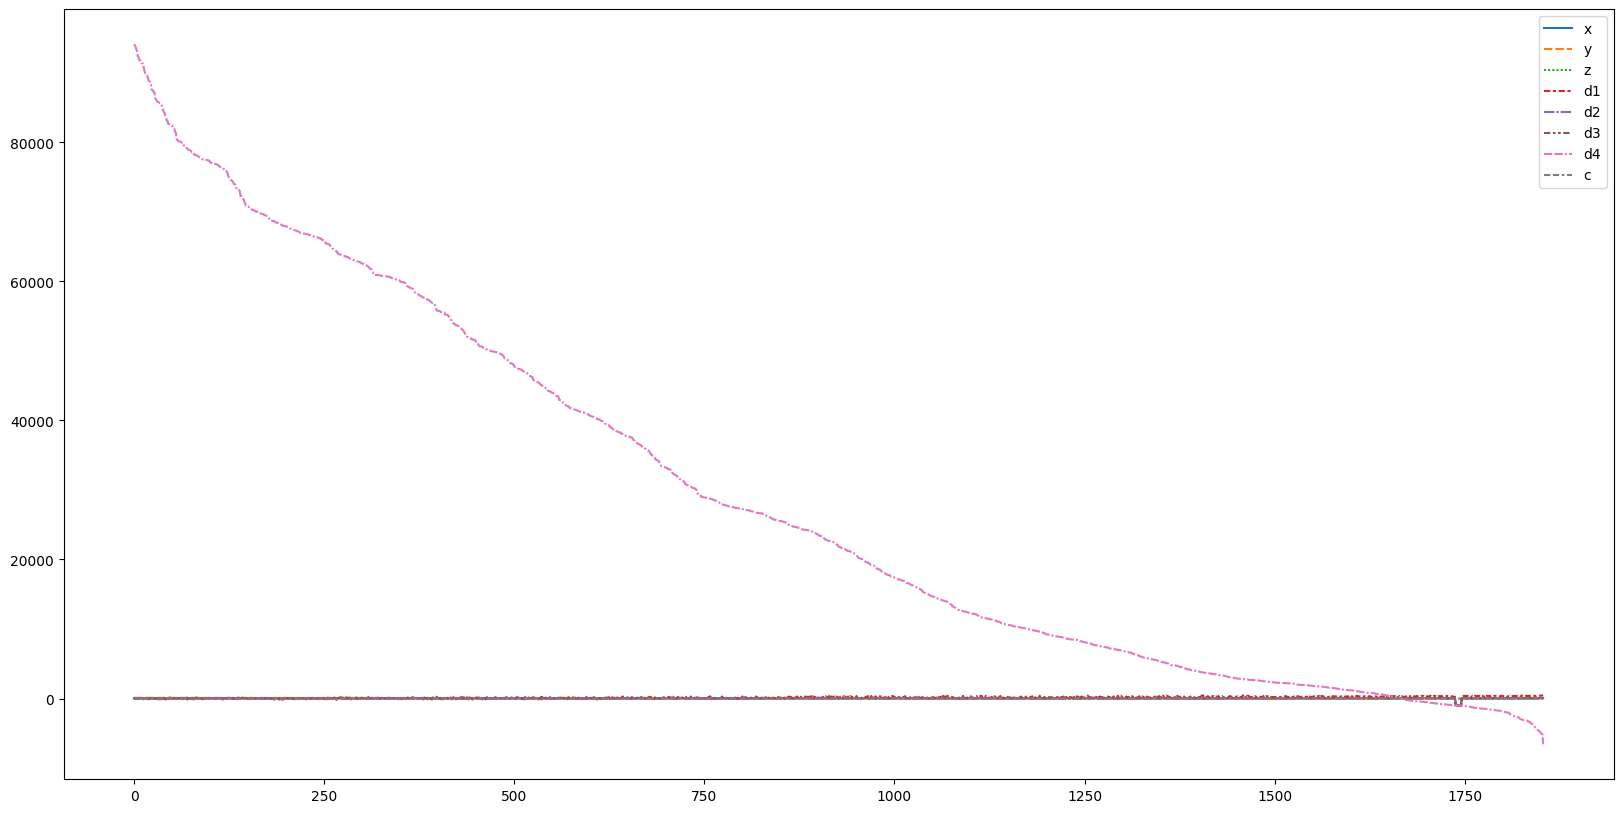

In [27]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_mystery_sep)
plt.show()

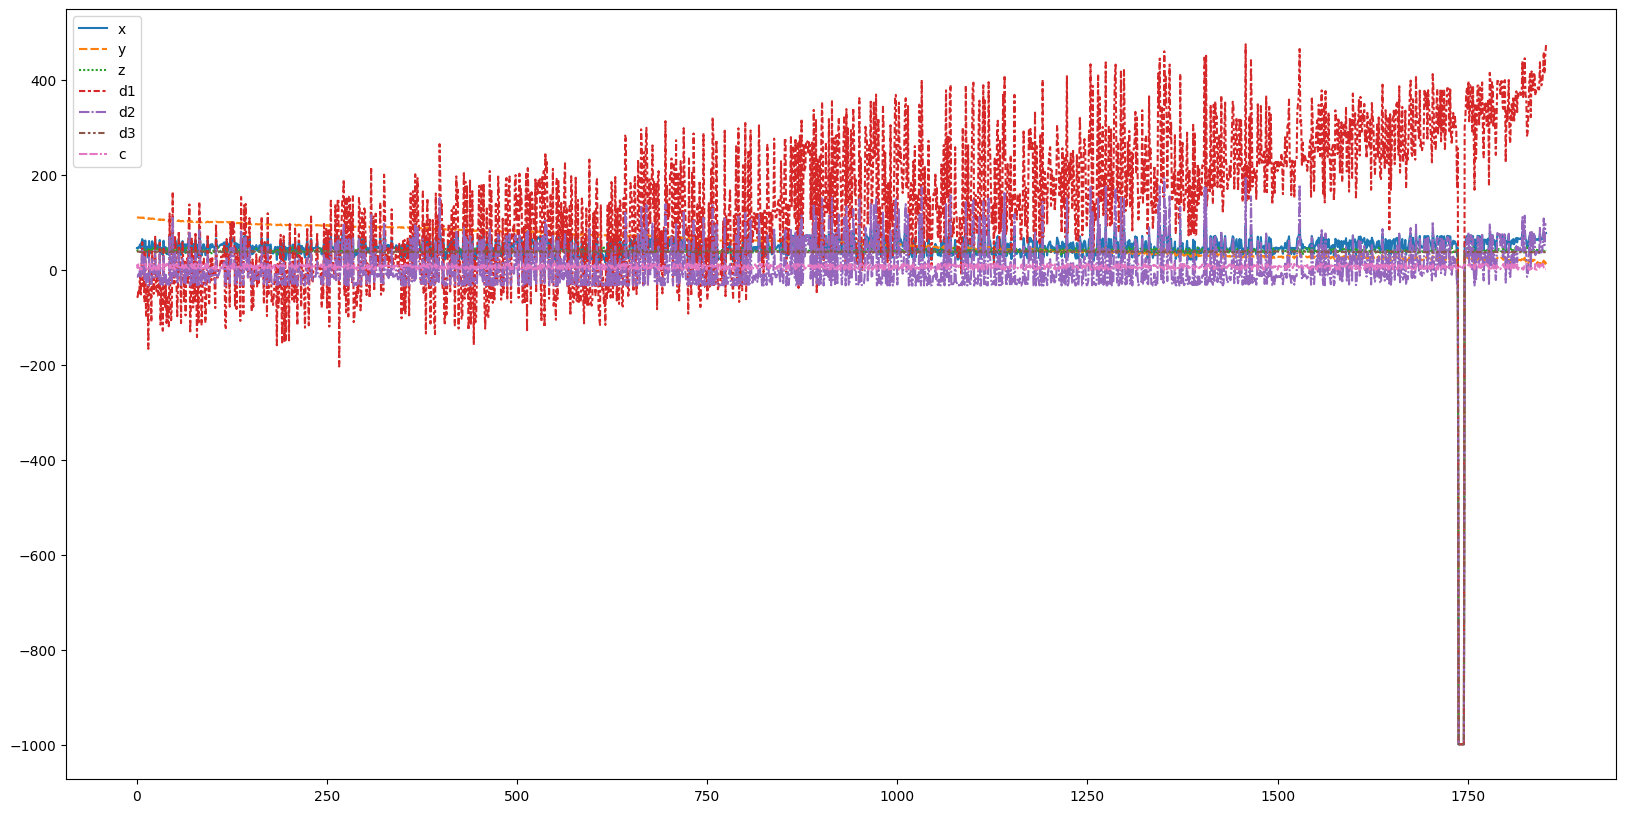

In [28]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_mystery_sep[['x', 'y', 'z', 'd1', 'd2', 'd3', 'c']])
plt.show()

well that's ugly. Hard to graph with the -999s for x.  
maybe the same data is missing from x, y, and z? 
Which x values have -999, and what does the other data look like/ what might it mean?

In [29]:
index999s = df_mystery_sep[df_mystery_sep['x'] == -999].index
index999s
df_mystery_sep.iloc[index999s]

x      y      z     d1     d2     d3     d4     c
1738 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   8.0
1739 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   7.0
1740 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   6.0
1741 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   9.0
1742 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   5.0
1743 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   4.0
1744 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   3.0
1745 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0  10.0

In [30]:
df_mystery_sep[df_mystery_sep['x'] == -999].value_counts()

x       y       z       d1      d2      d3      d4      c   
-999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  3.0     1
                                                        4.0     1
                                                        5.0     1
                                                        6.0     1
                                                        7.0     1
                                                        8.0     1
                                                        9.0     1
                                                        10.0    1
Name: count, dtype: int64

When x is -99, y, z, d1, d3, d3, and d4 or ALSO -999, but c has a value?  confusing.
Do the other columns have -999 when x is NOT -999?

In [31]:
indexy999s = df_mystery_sep[df_mystery_sep['y'] == -999].index
indexy999s
df_mystery_sep.iloc[indexy999s]


x      y      z     d1     d2     d3     d4     c
1738 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   8.0
1739 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   7.0
1740 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   6.0
1741 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   9.0
1742 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   5.0
1743 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   4.0
1744 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   3.0
1745 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0  10.0

In [178]:
indexy999s = df_mystery_sep[df_mystery_sep['y'] == -999].index
indexz999s = df_mystery_sep[df_mystery_sep['z'] == -999].index
indexd1999s = df_mystery_sep[df_mystery_sep['d1'] == -999].index
indexd2999s = df_mystery_sep[df_mystery_sep['d2'] == -999].index
indexd3999s = df_mystery_sep[df_mystery_sep['d3'] == -999].index
indexd4999s = df_mystery_sep[df_mystery_sep['d4'] == -999].index
print('x & y: ', index999s == indexy999s, '\nx & z: ', index999s == indexz999s, '\nx & d1: ', index999s == indexd1999s, '\nx & d2: ', index999s  == indexd2999s, '\nx & d3: ', index999s == indexd3999s, '\nx & d4: ', index999s == indexd4999s )


x & y:  [ True  True  True  True  True  True  True  True] 
x & z:  [ True  True  True  True  True  True  True  True] 
x & d1:  [ True  True  True  True  True  True  True  True] 
x & d2:  [ True  True  True  True  True  True  True  True] 
x & d3:  [ True  True  True  True  True  True  True  True] 
x & d4:  [ True  True  True  True  True  True  True  True]


rows in index have -999s in all columns except c, and those are the only rows that have -999s.  going to create a new df without those rows for better visualization.  May need to explore why they still have c values later, but this seems to indicate that the value in c is NOT dependent on x, y, z, d1, d2, d3, or d4
In reality, because we dont know anything about this data, we can't know how significant or insignificant the -999s are.

In [180]:
# confirming there are no -999s remaining
df_mystery_sep2 = df_mystery_sep[df_mystery_sep['x'] != -999]
df_mystery_sep2.iloc[index999s]
df_mystery_sep2[df_mystery_sep2 == -999]. value_counts()

Series([], Name: count, dtype: int64)

What does the value distribution look like now?

In [35]:
df_mystery_sep2.describe()

x            y            z           d1           d2  \
count  1846.000000  1846.000000  1846.000000  1846.000000  1846.000000   
mean     49.225695    57.955099    39.997406   143.226810     7.622558   
std      16.713001    26.847766     2.974248   141.325319    43.828991   
min      10.520750    10.135119    30.190542  -203.894934   -33.540389   
25%      36.033403    32.681073    37.977585    27.098028   -28.148776   
50%      47.551269    57.714450    39.945382   143.530673   -10.101627   
75%      62.237845    81.930778    42.018724   253.332106    32.481449   
max      93.248123   109.814680    48.870364   474.250238   193.247985   

                d3            d4            c  
count  1846.000000   1846.000000  1846.000000  
mean     37.786716  28732.589481     6.000000  
std       0.964186  26751.900963     3.742671  
min      36.589368  -6575.228052     0.000000  
25%      36.857343   4289.079588     3.000000  
50%      37.703620  22295.512173     6.000000  
75%      38.596542  50345.835908     9.000000  
max      39.963298  94095.637152    12.000000

In [ ]:
# difference between data distributions to see the affect of removing the -999 values
df_mystery_sep2.describe() - df_mystery_sep.describe()

x            y            z          d1          d2  \
count    -8.000000    -8.000000    -8.000000   -8.000000   -8.000000   
mean      4.523088     4.560756     4.483268    4.928703    4.343571   
std     -54.007753   -47.448897   -65.211639  -18.346362  -35.344908   
min    1009.520750  1009.135119  1029.190542  795.105066  965.459611   
25%       0.170501     0.377588     0.035843    2.128359    0.164025   
50%       0.076342     0.285528     0.025061    0.636661    0.164998   
75%       0.047854     0.036086     0.006710    0.665298    0.173779   
max       0.000000     0.000000     0.000000    0.000000    0.000000   

                d3          d4         c  
count    -8.000000   -8.000000 -8.000000  
mean      4.473729  128.291648 -0.002157  
std     -67.018949  -13.269630  0.004911  
min    1035.589368    0.000000  0.000000  
25%       0.003238  182.657456  0.000000  
50%       0.005145  442.672490  0.000000  
75%       0.003660  125.503963  0.000000  
max       0.000000    0.000000  0.000000

d1 and d4 still have fairly large ranges, with low/large negative mins

In [36]:
df_mystery_sep2['c'].value_counts()

c
11.0    142
3.0     142
10.0    142
0.0     142
12.0    142
4.0     142
1.0     142
7.0     142
5.0     142
2.0     142
9.0     142
6.0     142
8.0     142
Name: count, dtype: int64

Interestestingly, now the values in c all occur the same number of times.  Still not sure what was up with -999s, why they all occured together in a cluster. May be worth exploration later. 

Now visualize without the rows that had -999 values

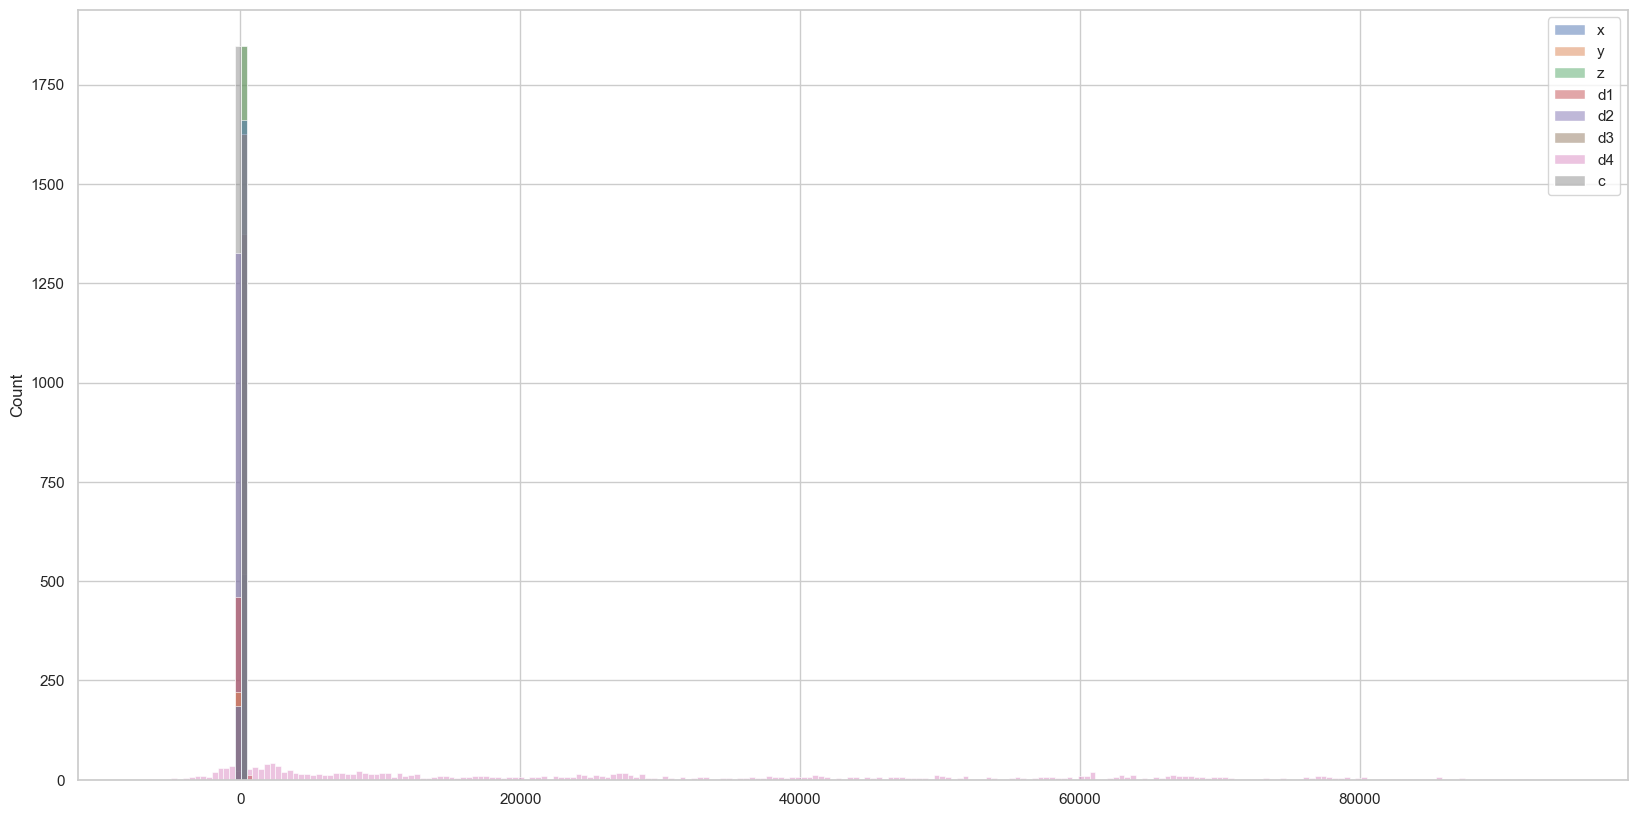

In [151]:
plt.figure(figsize=(20,10))
sns.histplot(data=df_mystery_sep2)
plt.show()

min and max of d4 are extreme.  may consider graphing log of that one later, rt now regraph with the other values: 


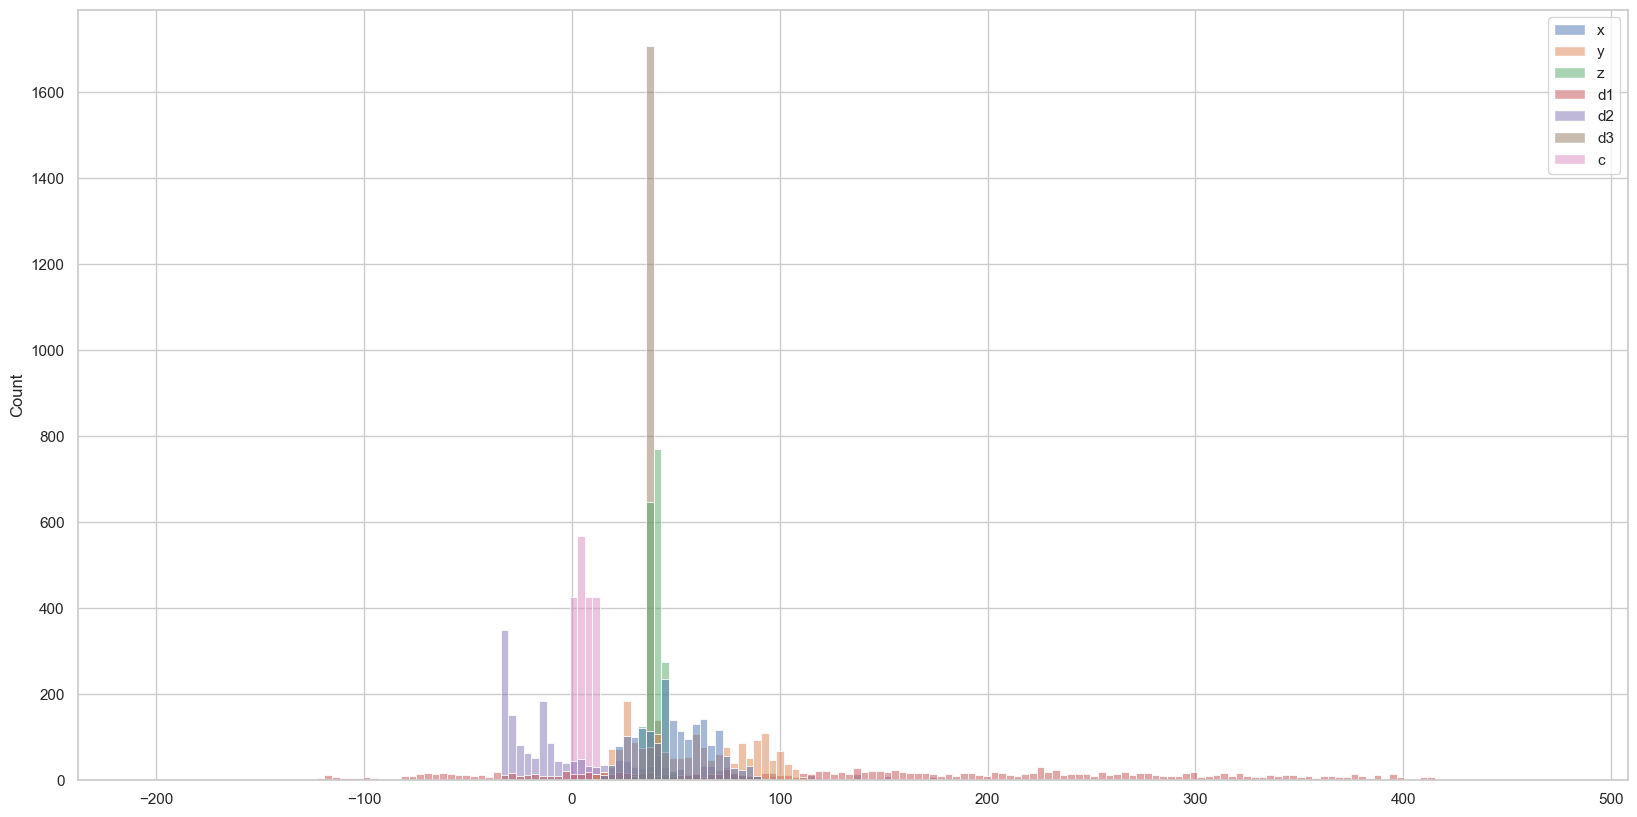

In [145]:
df_non_extremes = df_mystery_sep2[['x', 'y', 'z', 'd1', 'd2', 'd3', 'c']]
plt.figure(figsize=(20,10))
sns.histplot(data = df_non_extremes)
plt.show()

hmm... still not easy to read. graph each individually to see how they look on their own scales.

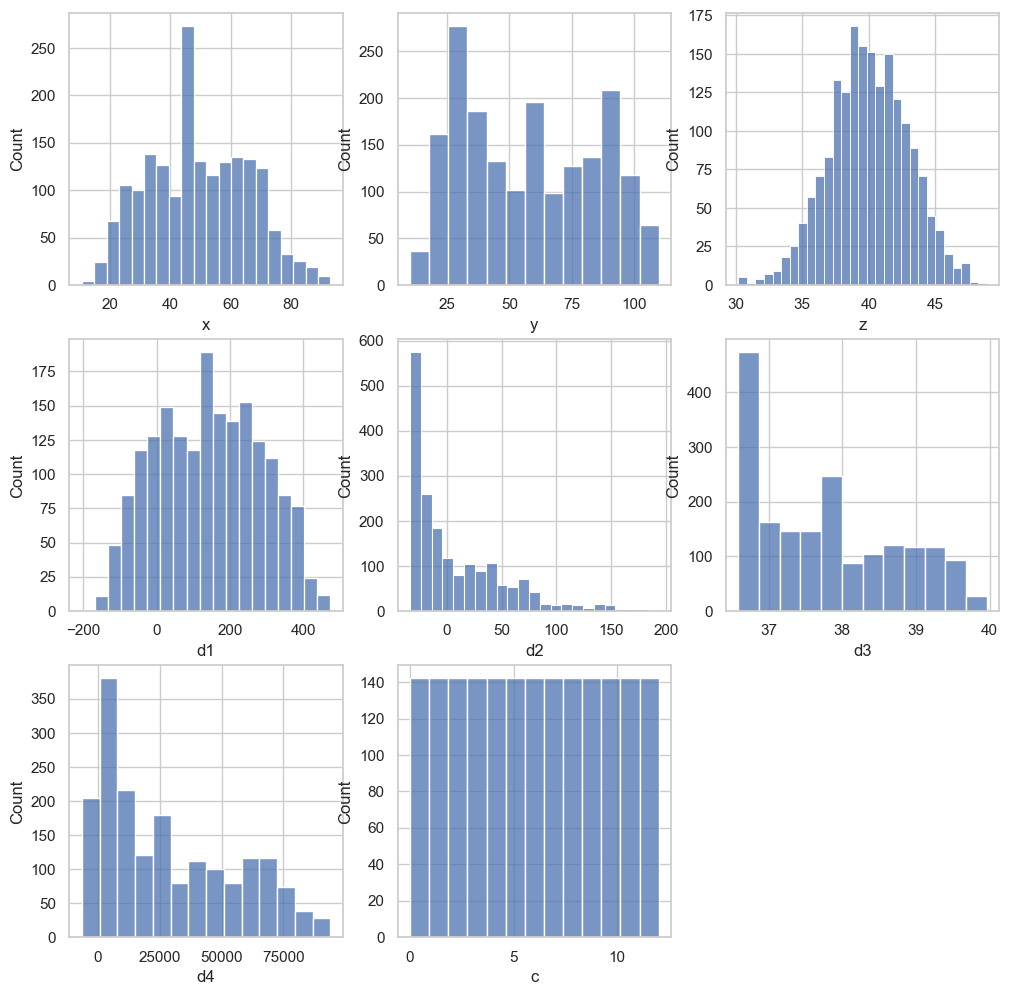

In [177]:
cols = ['x', 'y', 'z', 'd1', 'd2', 'd3', 'd4', 'c']

plt.figure(figsize= (12,12))
for col in cols:
    i = 331 + (cols.index(col))
    plt.subplot(i)
    sns.histplot(df_mystery_sep2[col])
plt.show()

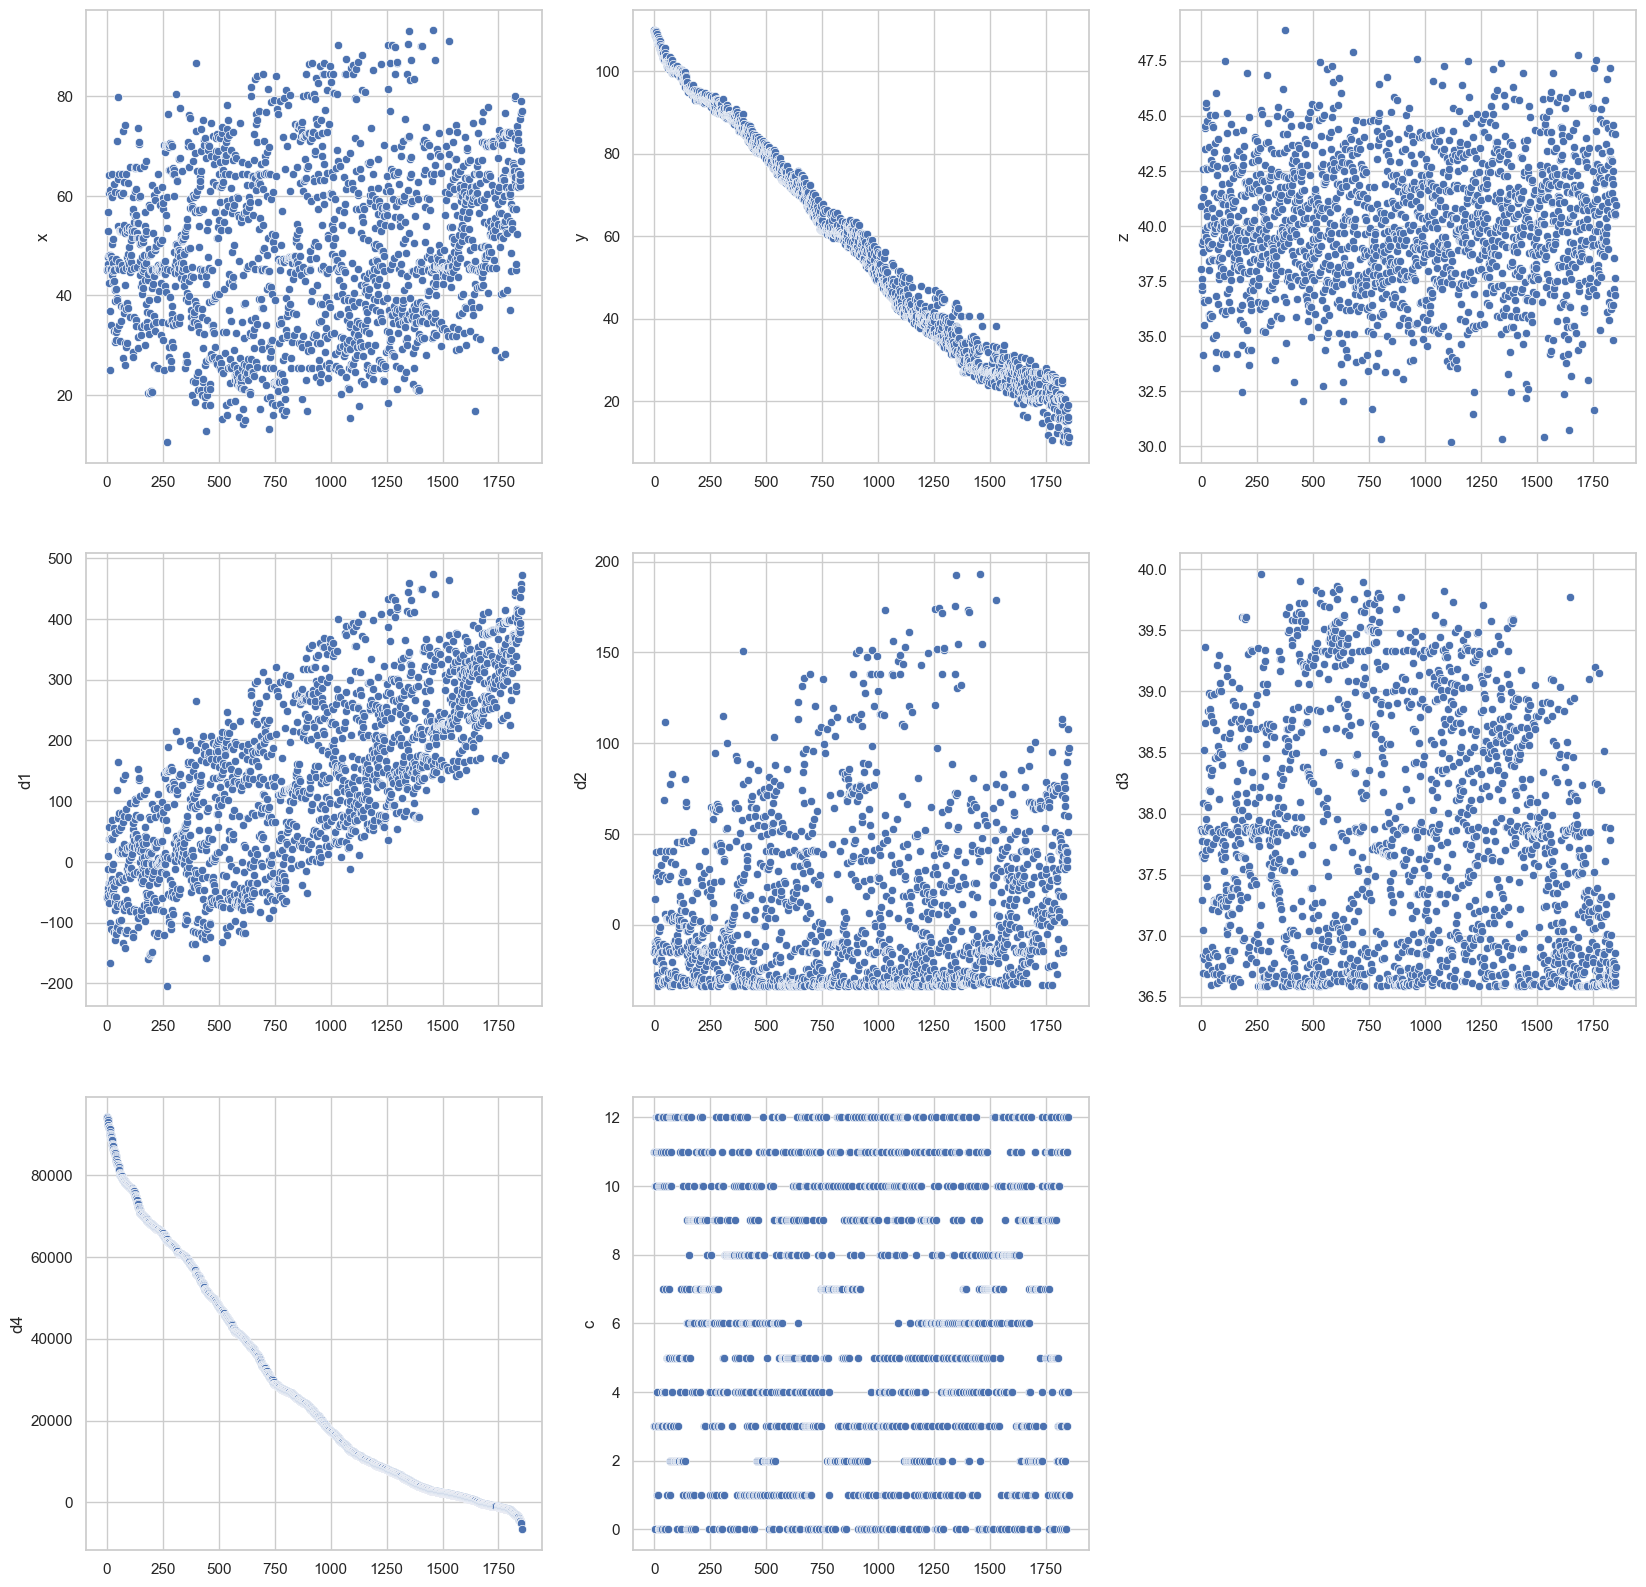

In [182]:
cols = ['x', 'y', 'z', 'd1', 'd2', 'd3', 'd4', 'c']

plt.figure(figsize= (20,20))
for col in cols:
    i = 331 + (cols.index(col))
    plt.subplot(i)
    sns.scatterplot(df_mystery_sep2[col])
plt.show()

This helps us better see the SHAPE of the dists/ hists, but since their scales are adjusted, the previous graph helps to give perspective on true scale in relation to eachother.

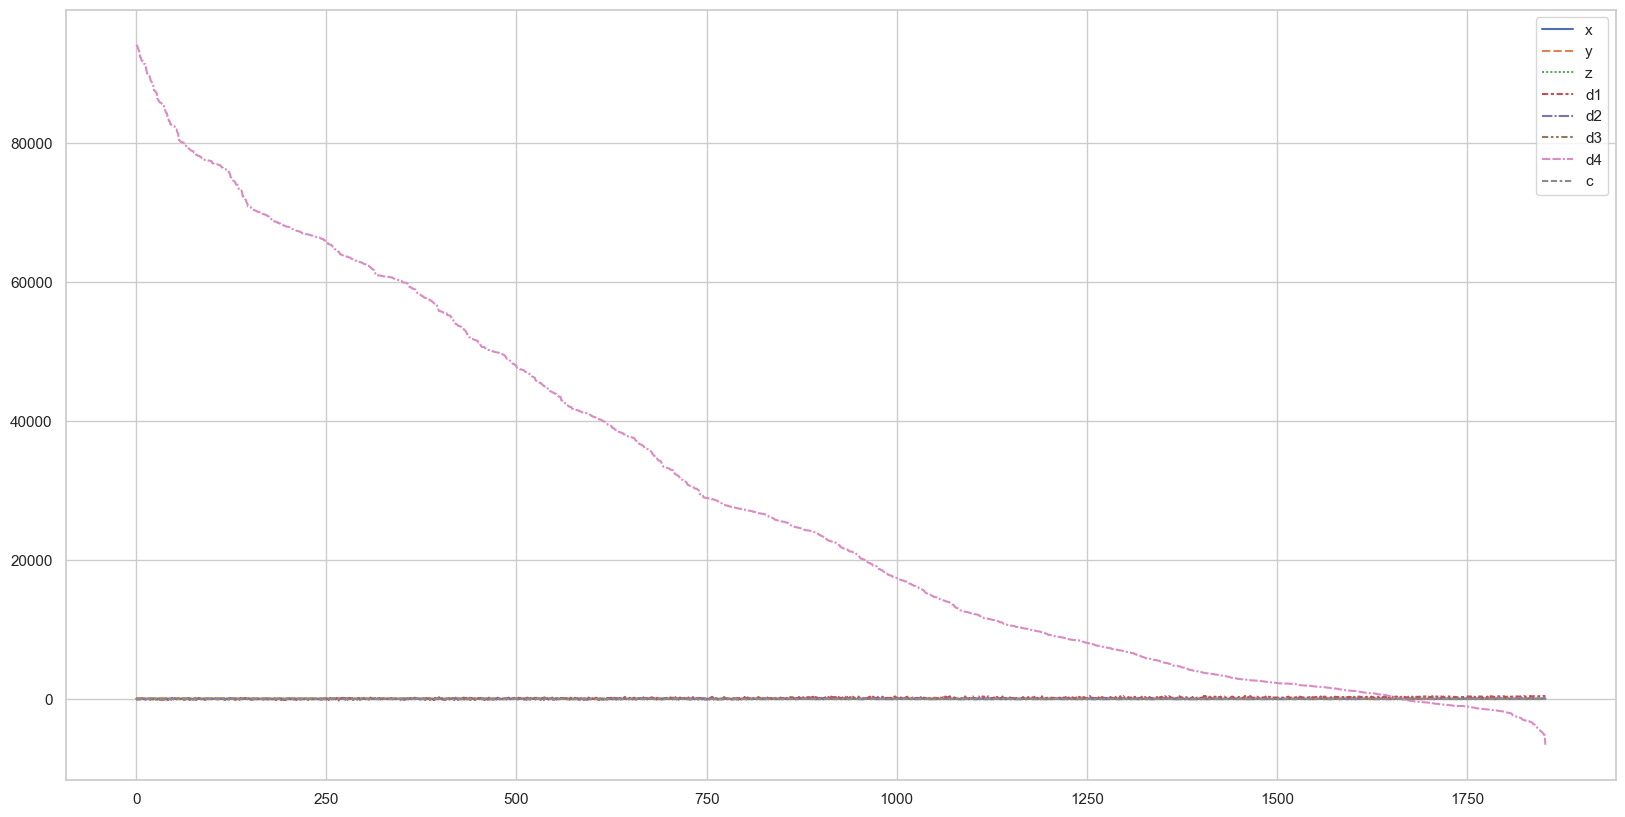

In [181]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_mystery_sep2)
plt.show()

Scale of d4 is so extreme, it shrinks all of the other columns are indistinguishable.
Take a look at them seperatley.

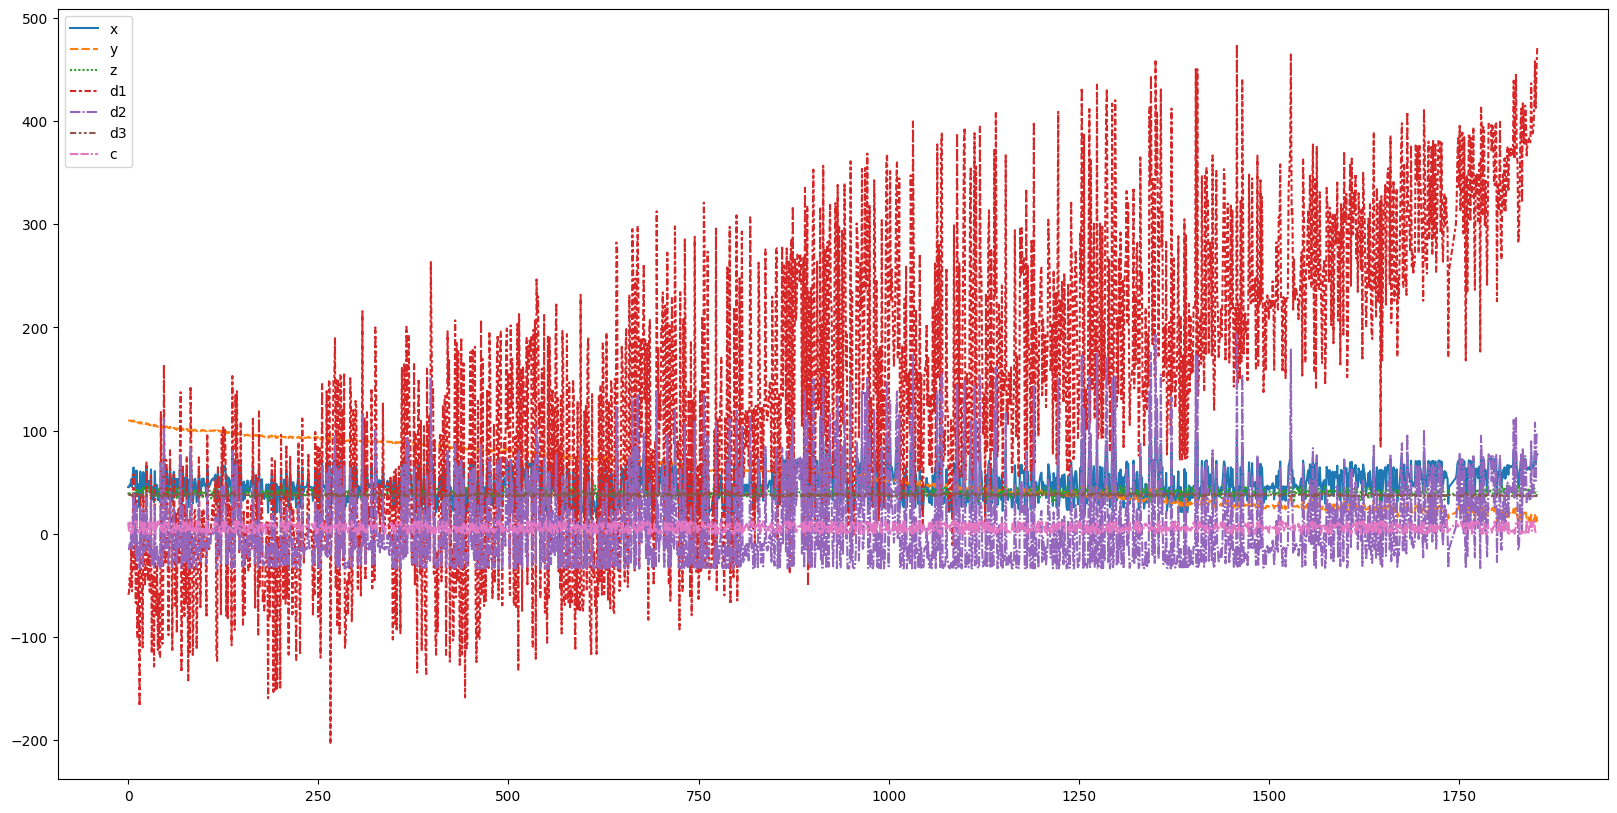

In [40]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_non_extremes)
plt.show()

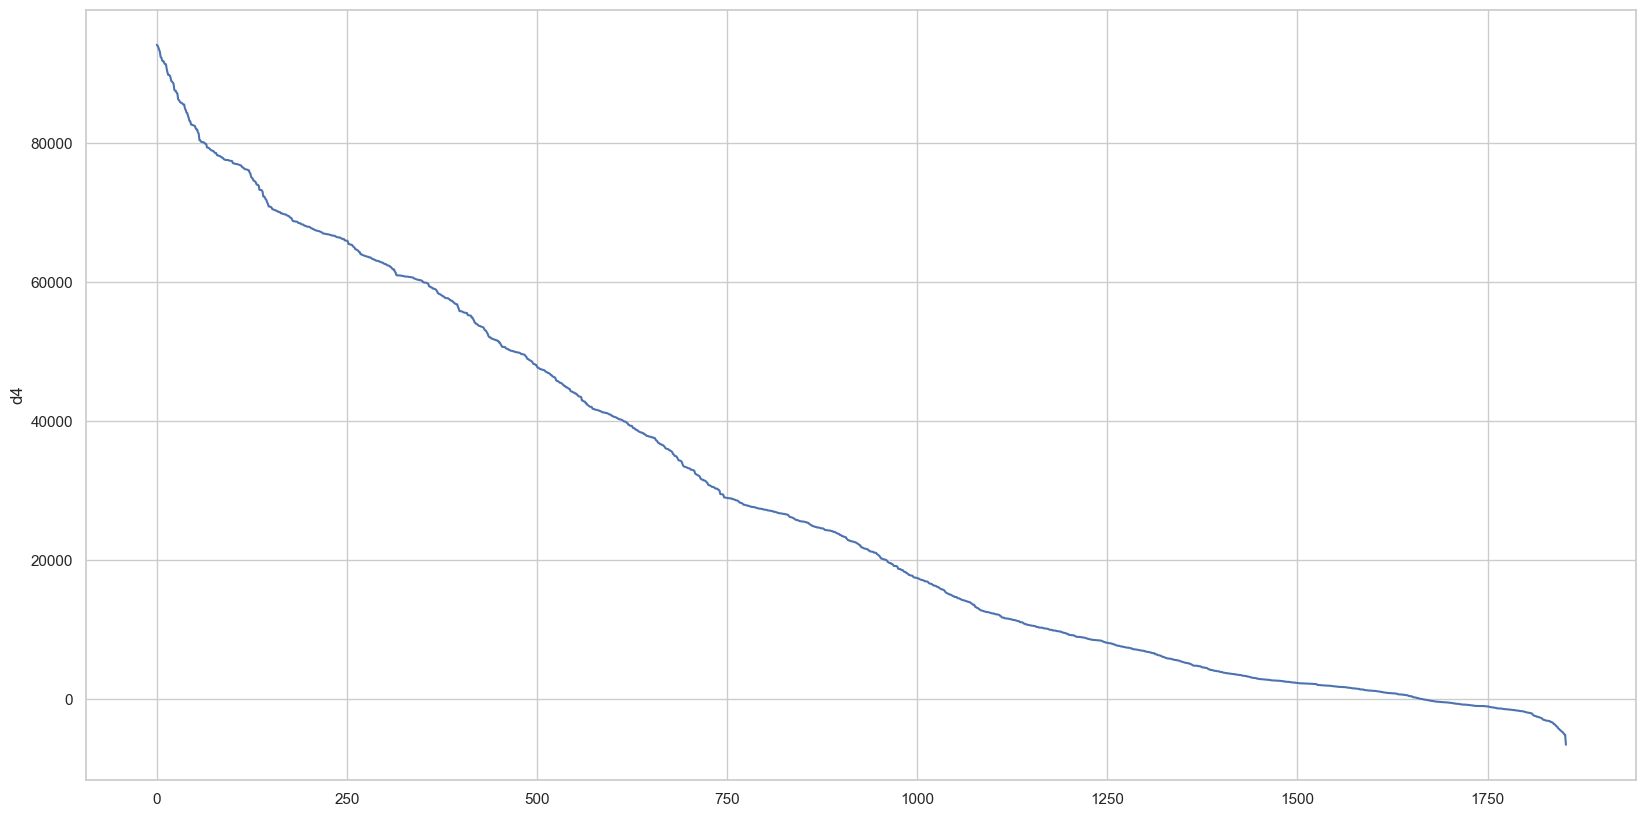

In [154]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_mystery_sep2['d4'])
plt.show()

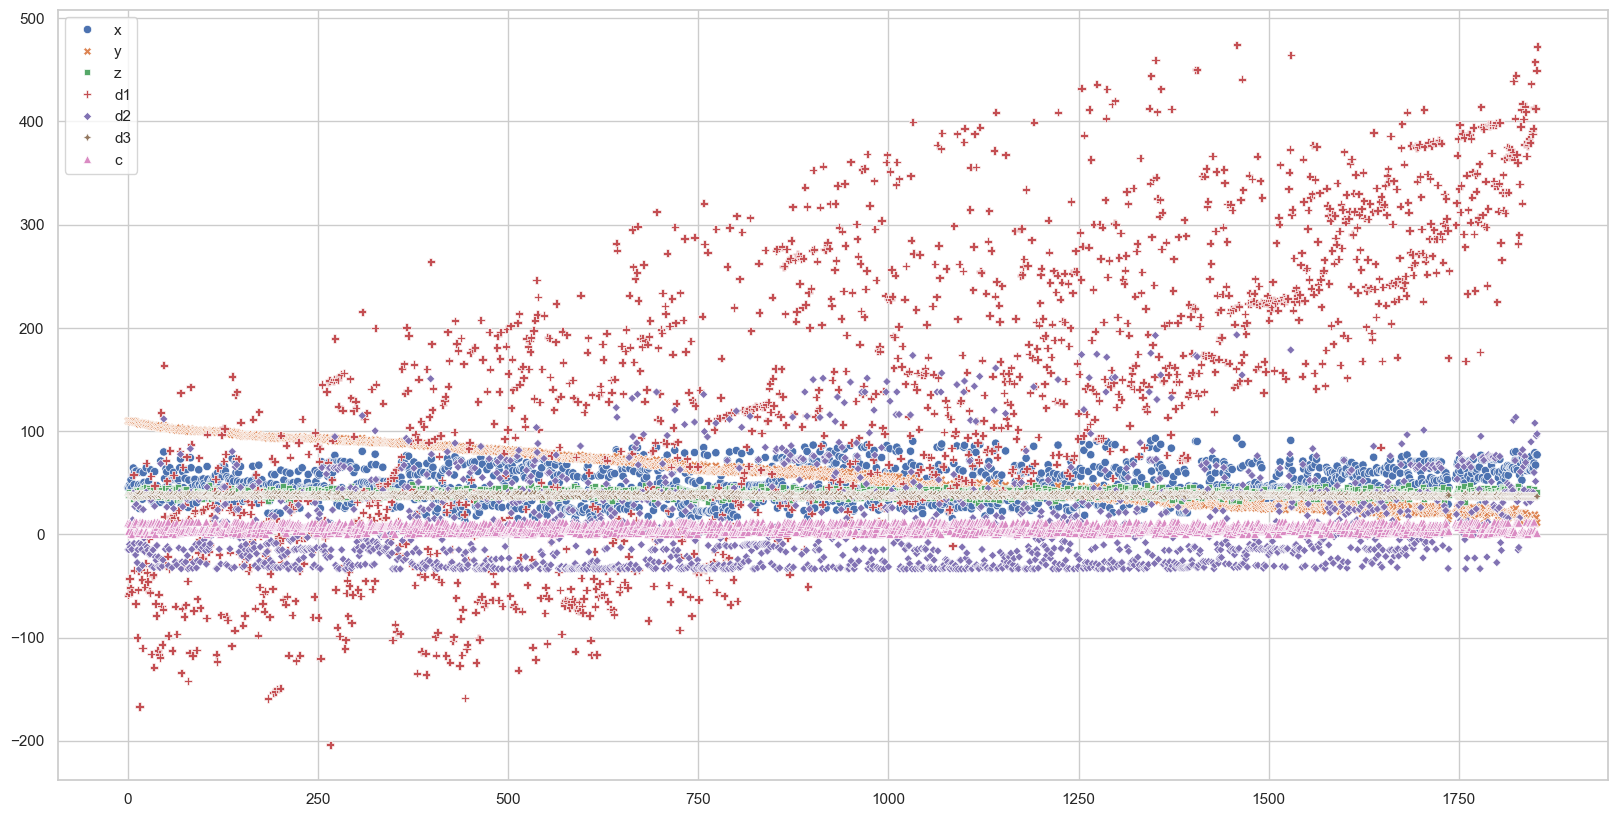

In [152]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_non_extremes)
plt.show()

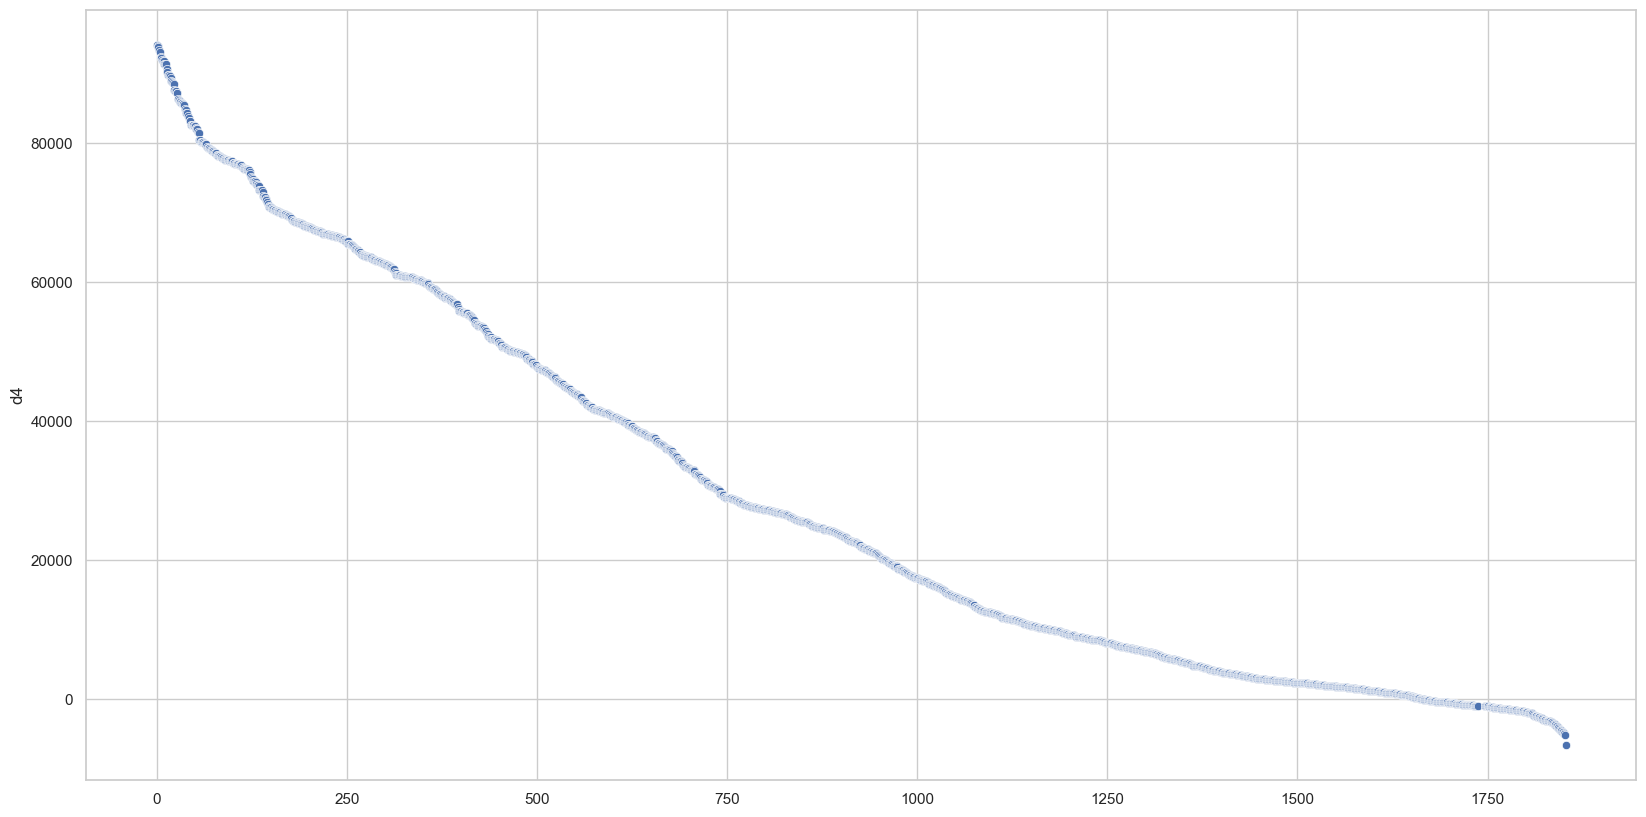

In [155]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_mystery_sep2['d4'])
plt.show()

Take a look at correlations

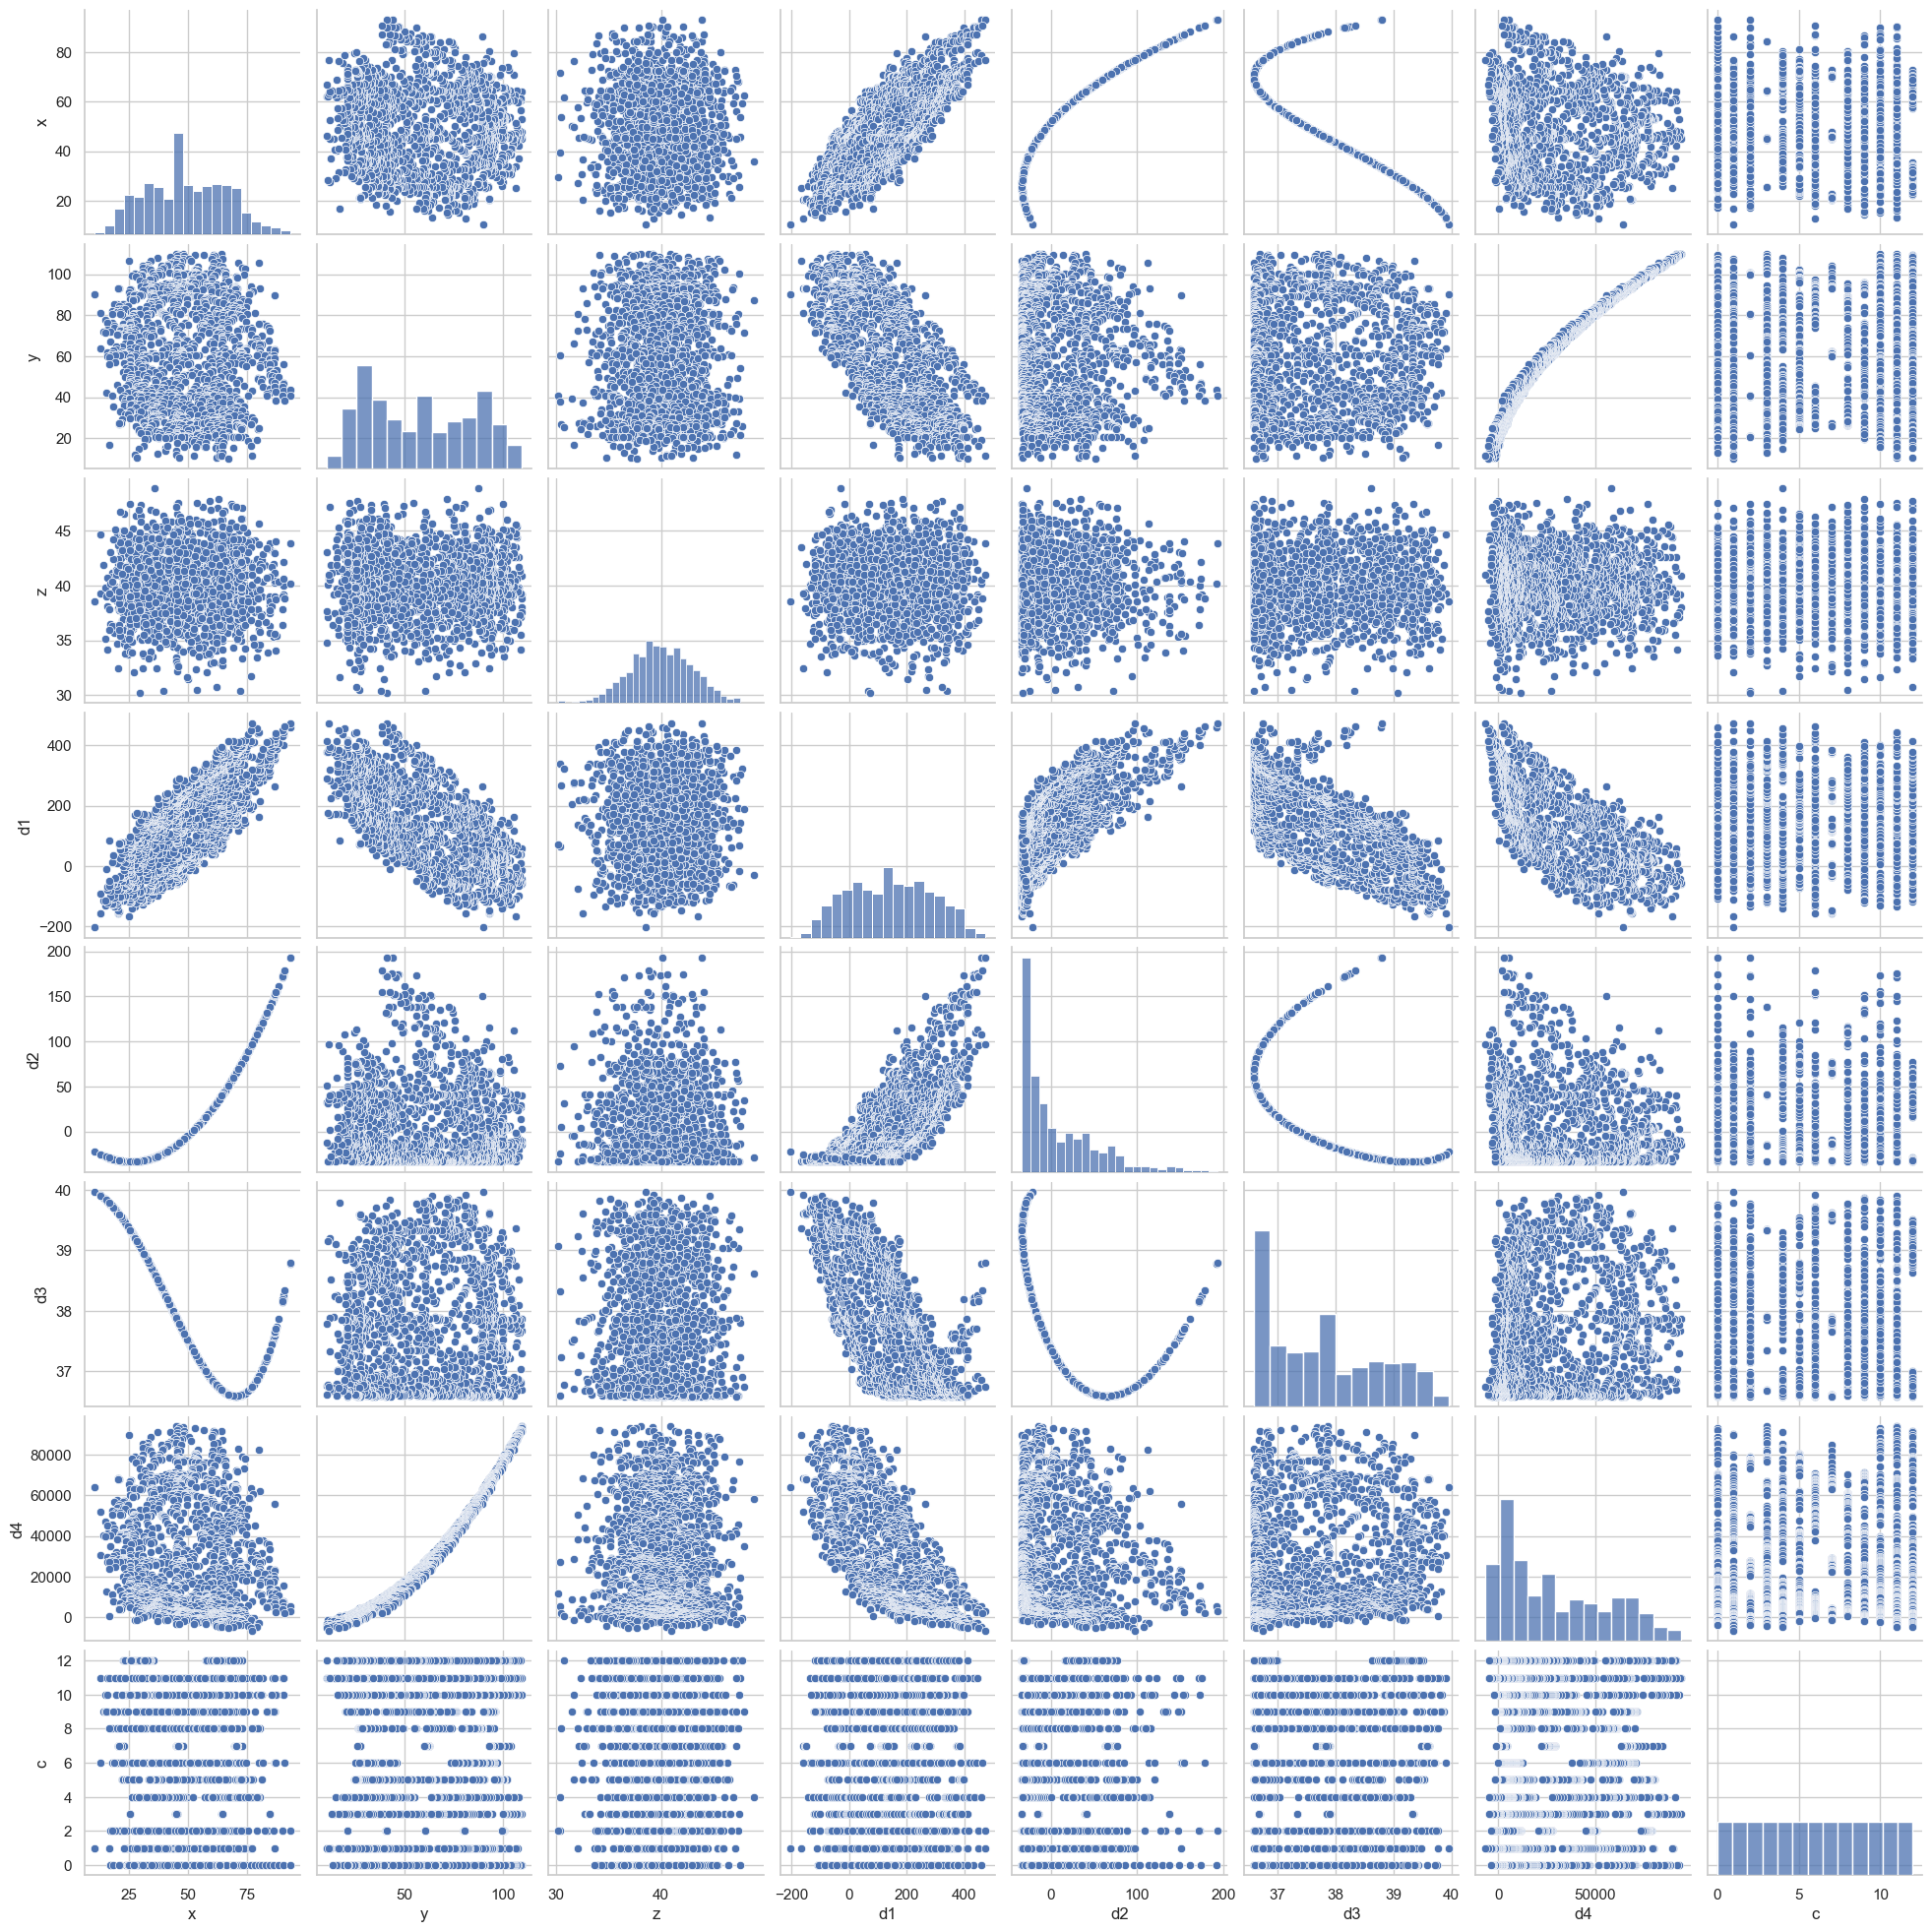

In [156]:
sns.pairplot(df_mystery_sep2)
plt.show()

In [ ]:
# checking correlation coeffs before dropping the -999s
corr = df_mystery_sep.corr()
corr

x         y         z        d1        d2        d3        d4  \
x   1.000000  0.900811  0.970979  0.614958  0.931553  0.968659  0.042991   
y   0.900811  1.000000  0.931755  0.216572  0.765811  0.932928  0.420782   
z   0.970979  0.931755  1.000000  0.469802  0.832811  0.998940  0.072381   
d1  0.614958  0.216572  0.469802  1.000000  0.737677  0.460287 -0.599303   
d2  0.931553  0.765811  0.832811  0.737677  1.000000  0.827831 -0.012223   
d3  0.968659  0.932928  0.998940  0.460287  0.827831  1.000000  0.073970   
d4  0.042991  0.420782  0.072381 -0.599303 -0.012223  0.073970  1.000000   
c  -0.008508 -0.008185 -0.008566 -0.003982 -0.007279 -0.008938 -0.000711   

           c  
x  -0.008508  
y  -0.008185  
z  -0.008566  
d1 -0.003982  
d2 -0.007279  
d3 -0.008938  
d4 -0.000711  
c   1.000000

In [121]:
# checking the correlation coeffs AFTER dropping the -999s
corr2 = df_mystery_sep2.corr()
corr2

x         y         z        d1        d2        d3        d4  \
x   1.000000 -0.066019  0.009865  0.764230  0.932531 -0.911707 -0.118146   
y  -0.066019  1.000000 -0.005728 -0.693648 -0.058757  0.057258  0.981174   
z   0.009865 -0.005728  1.000000  0.031862  0.000407 -0.020037 -0.008786   
d1  0.764230 -0.693648  0.031862  1.000000  0.710669 -0.695092 -0.719156   
d2  0.932531 -0.058757  0.000407  0.710669  1.000000 -0.726094 -0.132387   
d3 -0.911707  0.057258 -0.020037 -0.695092 -0.726094  1.000000  0.081241   
d4 -0.118146  0.981174 -0.008786 -0.719156 -0.132387  0.081241  1.000000   
c   0.000064 -0.000012  0.004511  0.000149  0.000059 -0.011880 -0.000072   

           c  
x   0.000064  
y  -0.000012  
z   0.004511  
d1  0.000149  
d2  0.000059  
d3 -0.011880  
d4 -0.000072  
c   1.000000

dropping -999s significantly changes the correlation coefficients. 

<Axes: >

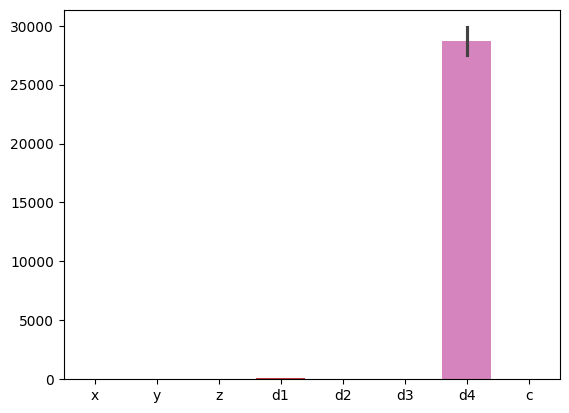

In [44]:
sns.barplot(df_mystery_sep2)

<Axes: >

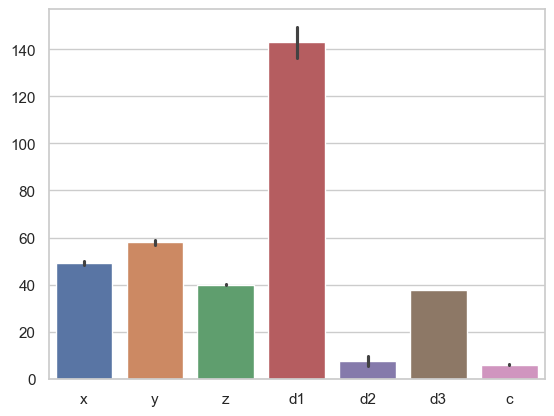

In [158]:
sns.barplot(df_non_extremes)

<Axes: >

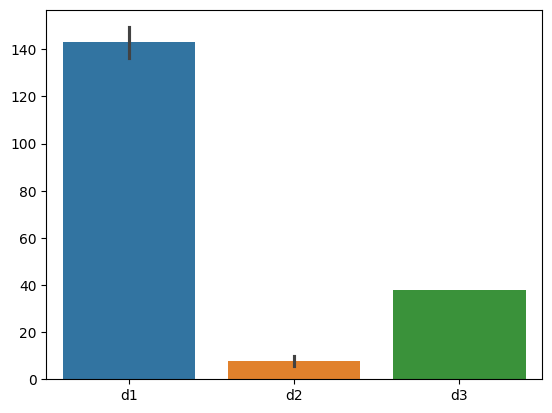

In [46]:
sns.barplot(df_mystery_sep2[['d1', 'd2', 'd3']])

# MOVE THIS DATA OR GET RID OF IT 

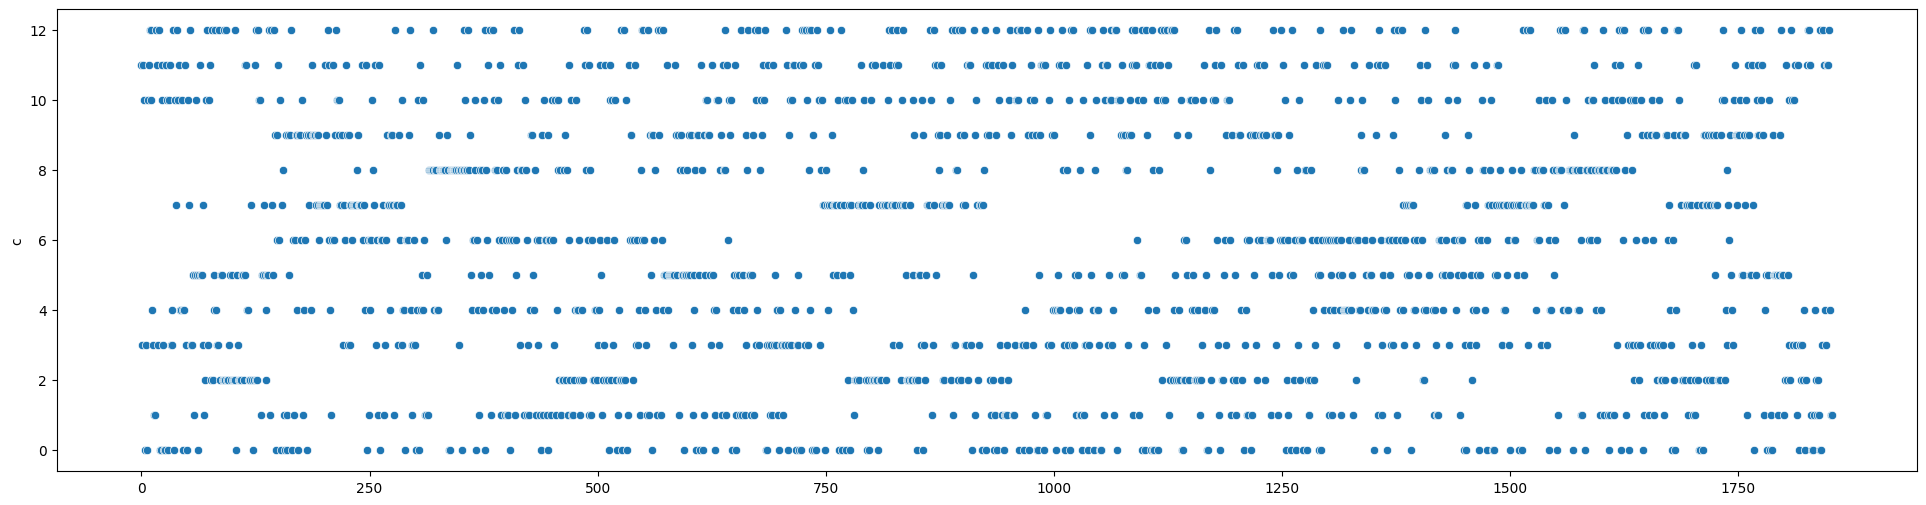

In [53]:
plt.figure(figsize= (24,6))
sns.scatterplot(df_mystery_sep['c'])
plt.show()

# this is maybe kind of interesting

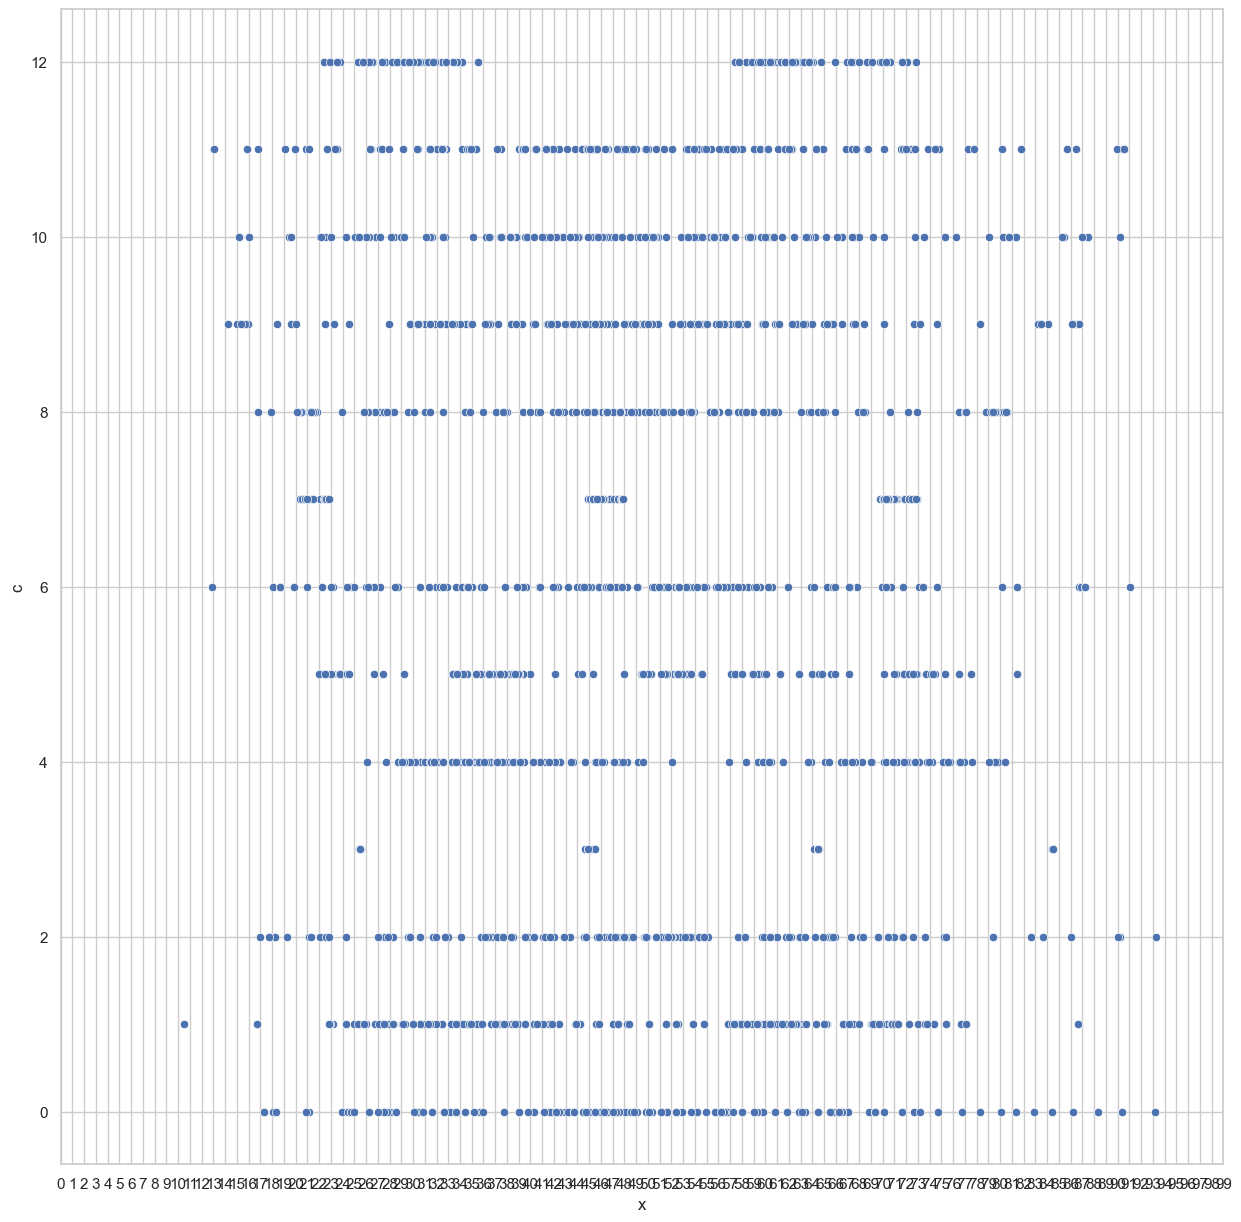

In [187]:
plt.figure(figsize= (15,15))
sns.scatterplot(data = df_mystery_sep[df_mystery_sep['x']!= -999], x = 'x', y = 'c').set_xticks(range(100))
plt.show()

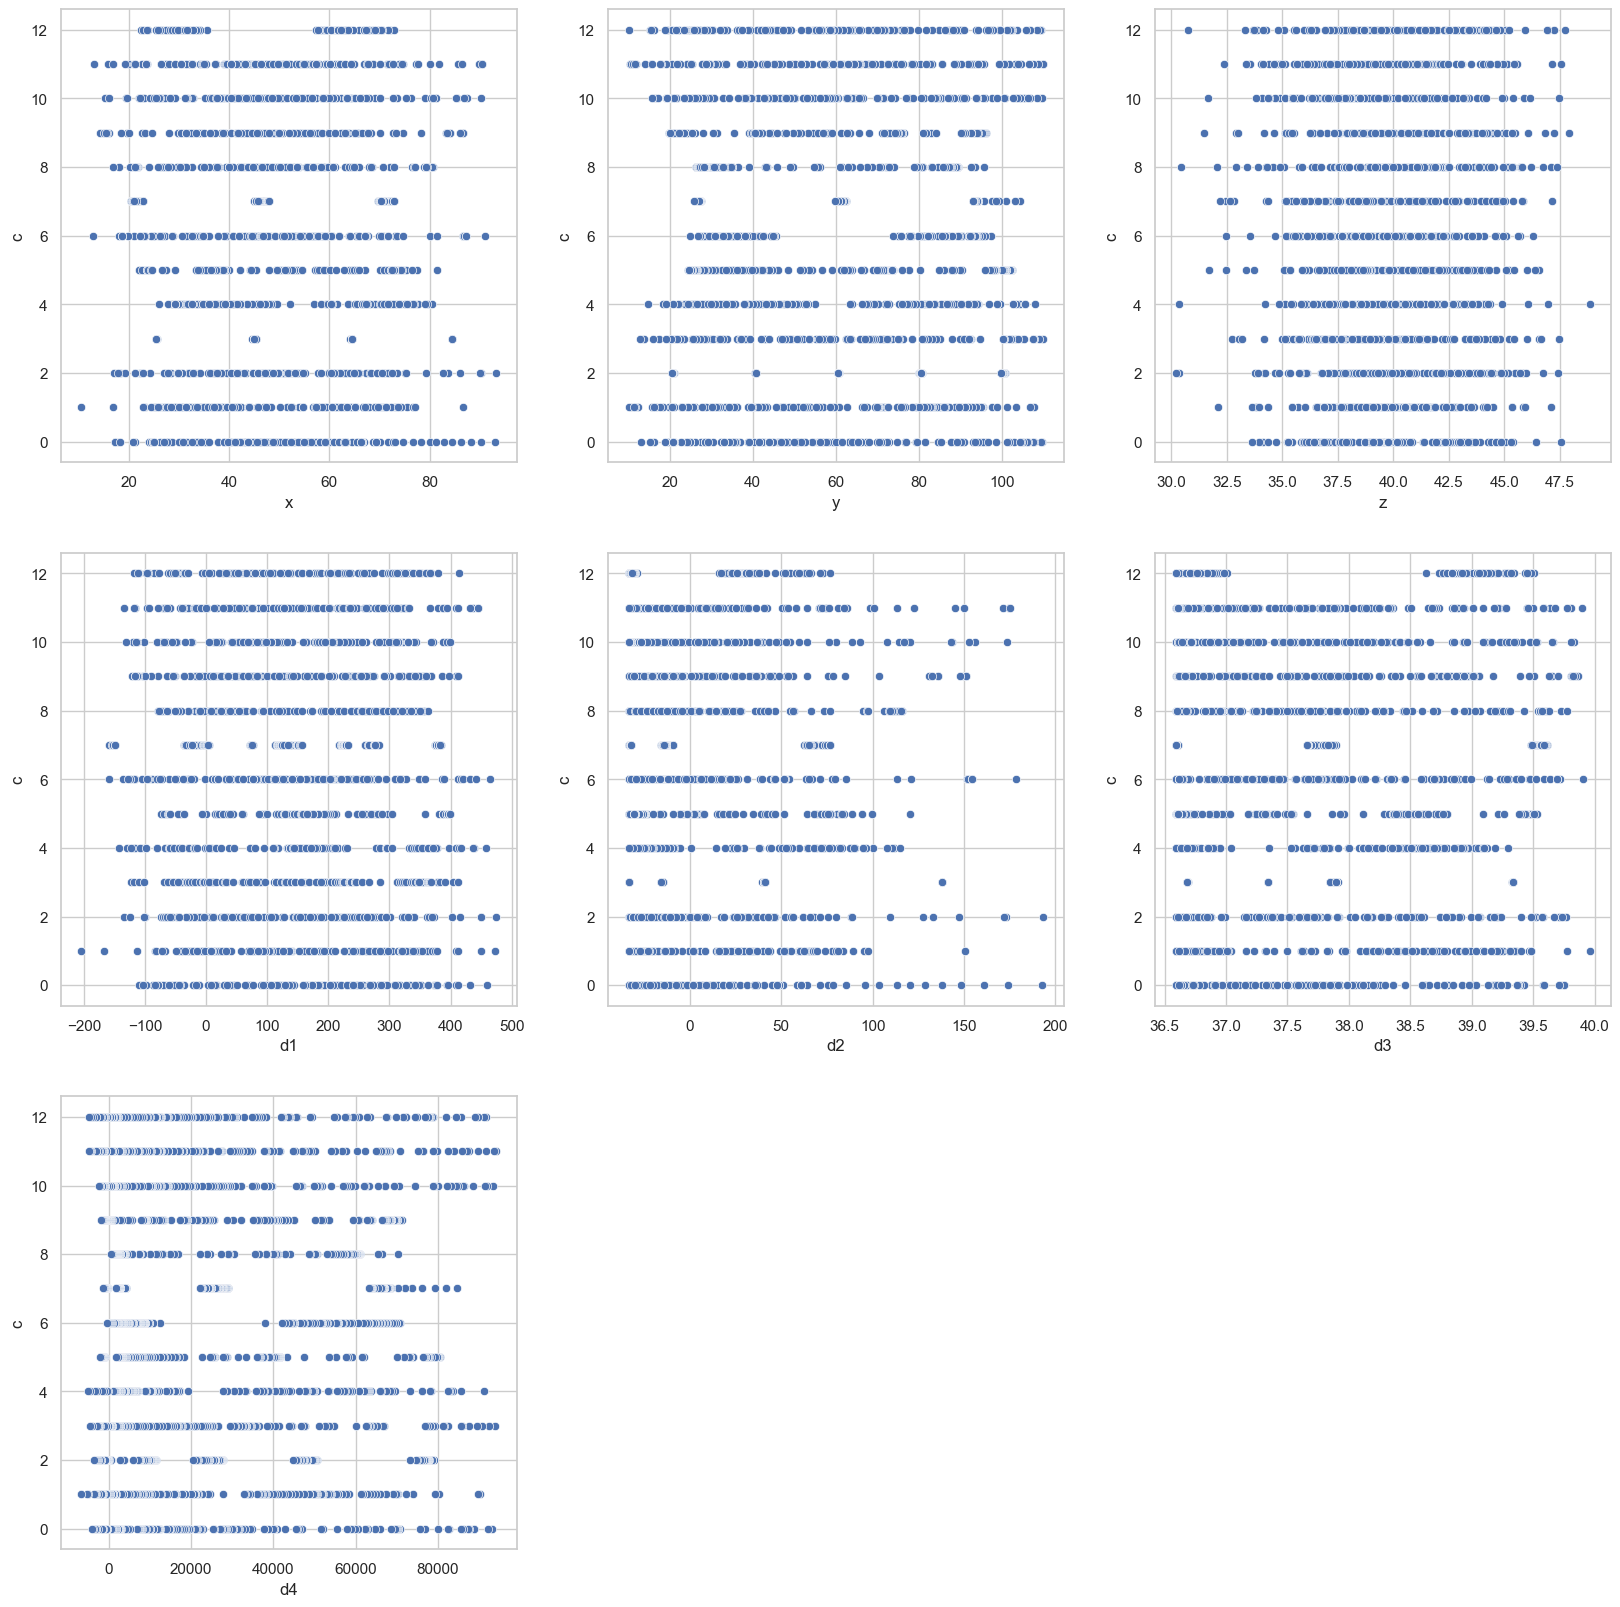

In [189]:
vars = ['x', 'y', 'z', 'd1', 'd2', 'd3', 'd4']

plt.figure(figsize= (20,20))
for var in vars:
    i = 331 + (vars.index(var))
    plt.subplot(i)
    sns.scatterplot(data = df_mystery_sep2, x = var, y = 'c')
plt.show()

In [56]:
df_mystery_sep['c'].value_counts().value_counts()

count
143    8
142    5
Name: count, dtype: int64

ok, idk whats going on there 
Is it categorical? Encoded? Figure that out later.
Dropping those to see what the other data does.

check out distributions with violin plots

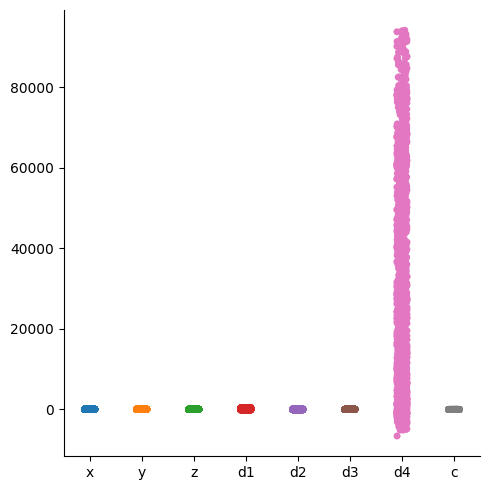

In [58]:
sns.catplot(data = df_mystery_sep2)

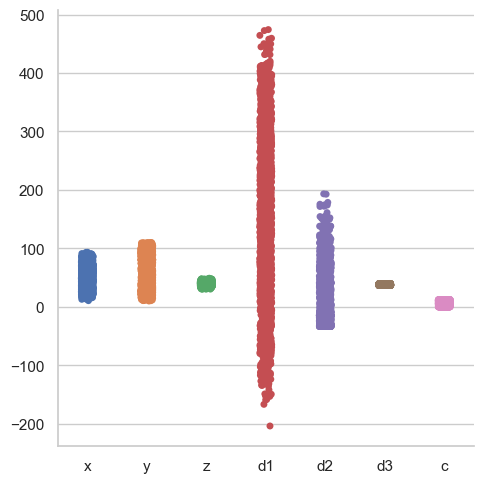

In [59]:
sns.set_theme(style="whitegrid")
sns.catplot(data = df_mystery_sep2[['x', 'y', 'z', 'd1', 'd2', 'd3', 'c']])

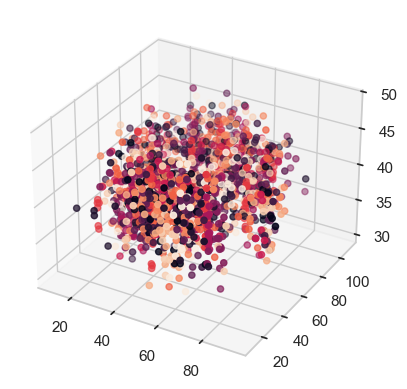

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
x = df_mystery_sep2['x']
y = df_mystery_sep2['y']
z = df_mystery_sep2['z']
c = df_mystery_sep2['c']
ax.scatter(x,y,z, c=c)
plt.show()

not every row is unique, at least for 'x'.  Let's plot to see.

scale is huge and hard to see for different columns. trying each seperatley.


Hint from TA - not useful. no idea wth is going on here

In [ ]:
# unique_vals = df_mystery['col'].unique()                      -pulling the unique values from a column .. or wait, pulling the unique columns?  Idk, doesnt make any sense

# for val in unique_vals:                                       -for each unique value that was retrieved 
#     val_data = df[df['col'] == val]                           -create a series of all of that value?  why?  ... if we pulled the unique columsn, this is jjust going to pull the values for the column
    
#     mean_v1 = val_data['v1'].mean()                           -find the mean for the first value in value data... wont that just be the value because we populated it with a specific unique value> .... adn then this will find the mean of the
#     mean_v2 = val_data['v2'].mean()
#     var_v1 = val_data['v1'].var()
#     var_v2 = val_data['v2'].var()
#     correlation_12 = val_data['v1'].corr(val_data['v2'])
    
#     print(f"\n {val}:")
#     print(f"  Mean of v1:      {mean_v1:.1f}")
#     print(f"  Mean of v2:      {mean_v2:.1f}")
#     print(f"  Variance of v1:  {var_v1:.1f}")
#     print(f"  Variance of v2:  {var_v2:.1f}")
#     print(f"  Correlation (v1, v2): {correlation_12:.2f}")
#     print(f"  Sample size:    {len(val_data)}")

  ## CANT YOU JUST DO THIS WITH DESCRIBE AND CORRELATION COEFFS AND HEATMAP??? 

# col = ['x', 'y', 'z', 'd1', 'd2', 'd3', 'd4', 'c']

col = 'c'
v1 = 'x'
v2 = 'd1'

unique_vals = df_mystery_sep2[col].unique()

for val in unique_vals:
    val_data = df_mystery_sep2[df_mystery_sep2[col] == val]
    
    mean_v1 = val_data[v1].mean()
    mean_v2 = val_data[v2].mean()
    var_v1 = val_data[v1].var()
    var_v2 = val_data[v2].var()
    correlation_12 = val_data[v1].corr(val_data[v2])
    
    print(f"\n {val}:")
    print("  Mean of ", v1, f":       {mean_v1:.1f}")
    print("  Mean of ", v2, f":      {mean_v2:.1f}")
    print("  Variance of ", v1, f":  {var_v1:.1f}")
    print("  Variance of ", v2, f":  {var_v2:.1f}")
    print("  Correlation ",(v1, v2), f": {correlation_12:.2f}")
    print(f"  Sample size:    {len(val_data)}")




 11.0:
  Mean of  x :       49.2
  Mean of  d1 :      142.9
  Variance of  x :  281.1
  Variance of  d1 :  20245.2
  Correlation  ('x', 'd1') : 0.77
  Sample size:    142

 3.0:
  Mean of  x :       49.2
  Mean of  d1 :      143.0
  Variance of  x :  281.2
  Variance of  d1 :  20155.9
  Correlation  ('x', 'd1') : 0.77
  Sample size:    142

 10.0:
  Mean of  x :       49.2
  Mean of  d1 :      142.7
  Variance of  x :  281.2
  Variance of  d1 :  20051.6
  Correlation  ('x', 'd1') : 0.77
  Sample size:    142

 0.0:
  Mean of  x :       49.2
  Mean of  d1 :      143.0
  Variance of  x :  281.1
  Variance of  d1 :  20060.5
  Correlation  ('x', 'd1') : 0.76
  Sample size:    142

 12.0:
  Mean of  x :       49.2
  Mean of  d1 :      143.4
  Variance of  x :  281.2
  Variance of  d1 :  20130.6
  Correlation  ('x', 'd1') : 0.76
  Sample size:    142

 4.0:
  Mean of  x :       49.2
  Mean of  d1 :      143.2
  Variance of  x :  281.2
  Variance of  d1 :  19944.1
  Correlation  ('x', 'd1') 

In [141]:
v1s = ['x', 'y', 'z', 'd1', 'd2', 'd3', 'd4']
v2s = ['x', 'y', 'z', 'd1', 'd2', 'd3', 'd4']

col = 'c'
# v1 = 'x'
# v2 = 'd1'

for v1 in v1s:
    for v2 in v2s:
        if (v1 != v2) & (v2s.index(v2) > v1s.index(v1)):

            unique_vals = df_mystery_sep2[col].unique()

            for val in unique_vals:
                val_data = df_mystery_sep2[df_mystery_sep2[col] == val]
                
                mean_v1 = val_data[v1].mean()
                mean_v2 = val_data[v2].mean()
                var_v1 = val_data[v1].var()
                var_v2 = val_data[v2].var()
                correlation_12 = val_data[v1].corr(val_data[v2])
                
                print(f"\n {val}:")
                print("  Mean of ", v1, f":       {mean_v1:.1f}")
                print("  Mean of ", v2, f":      {mean_v2:.1f}")
                print("  Variance of ", v1, f":  {var_v1:.1f}")
                print("  Variance of ", v2, f":  {var_v2:.1f}")
                print("  Correlation ",(v1, v2), f": {correlation_12:.2f}")
                print(f"  Sample size:    {len(val_data)}")



 11.0:
  Mean of  x :       49.2
  Mean of  y :      58.0
  Variance of  x :  281.1
  Variance of  y :  725.6
  Correlation  ('x', 'y') : -0.07
  Sample size:    142

 3.0:
  Mean of  x :       49.2
  Mean of  y :      58.0
  Variance of  x :  281.2
  Variance of  y :  725.6
  Correlation  ('x', 'y') : -0.07
  Sample size:    142

 10.0:
  Mean of  x :       49.2
  Mean of  y :      58.0
  Variance of  x :  281.2
  Variance of  y :  725.7
  Correlation  ('x', 'y') : -0.07
  Sample size:    142

 0.0:
  Mean of  x :       49.2
  Mean of  y :      58.0
  Variance of  x :  281.1
  Variance of  y :  725.5
  Correlation  ('x', 'y') : -0.06
  Sample size:    142

 12.0:
  Mean of  x :       49.2
  Mean of  y :      58.0
  Variance of  x :  281.2
  Variance of  y :  725.7
  Correlation  ('x', 'y') : -0.07
  Sample size:    142

 4.0:
  Mean of  x :       49.2
  Mean of  y :      58.0
  Variance of  x :  281.2
  Variance of  y :  725.2
  Correlation  ('x', 'y') : -0.07
  Sample size:    142

